# Walmart Sales Forecasting And Demand Analysis

Below is a step-by-step outline we follow in our Jupyter Notebook to perform "Walmart Sales Forecasting And Demand Analysis" using Python:

### 1. Data Import and Initial Inspection
In this step, we will load the dataset into a Pandas DataFrame and perform an initial exploration to understand its structure. We’ll:

Import necessary libraries.
Read the CSV file.
Display the first few rows.
Check the data types and summary statistics.

In [66]:
# Import necessary libraries
import pandas as pd

# Load the dataset (assuming the CSV file is in the same directory)
df = pd.read_csv("Walmart_Store_sales.csv")

# Display the first five rows to get a quick look at the data
print("First five rows of the dataset:")
print(df.head())

# Display information about the DataFrame: data types and non-null counts
print("\nDataFrame info:")
print(df.info())

# Generate summary statistics for numeric columns
print("\nSummary statistics:")
print(df.describe())


First five rows of the dataset:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-nu

### Historical Data Analysis
Objective: Explore historical weekly sales using summary statistics and visualization.

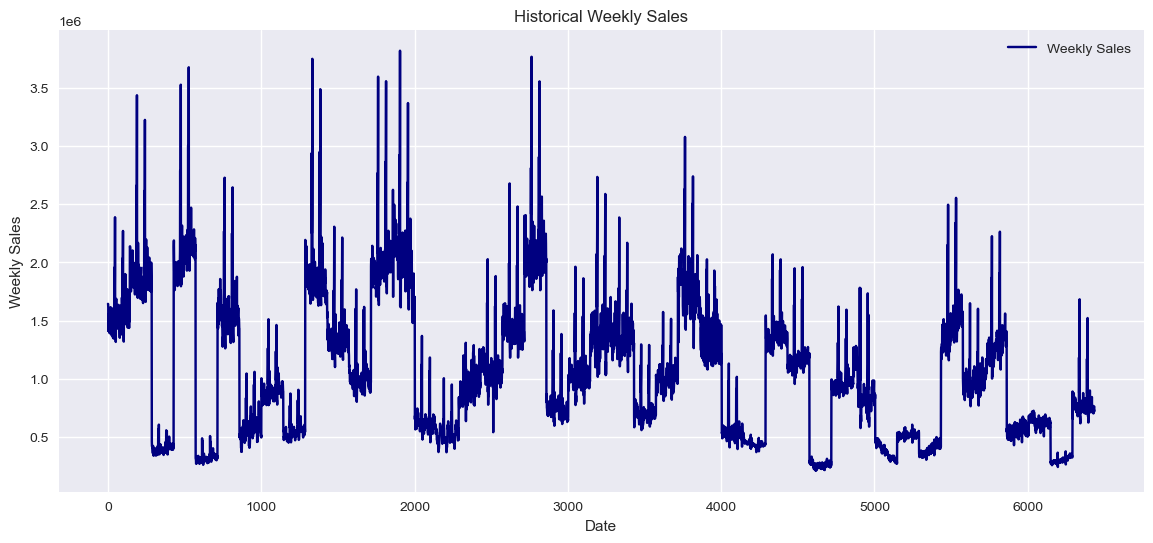

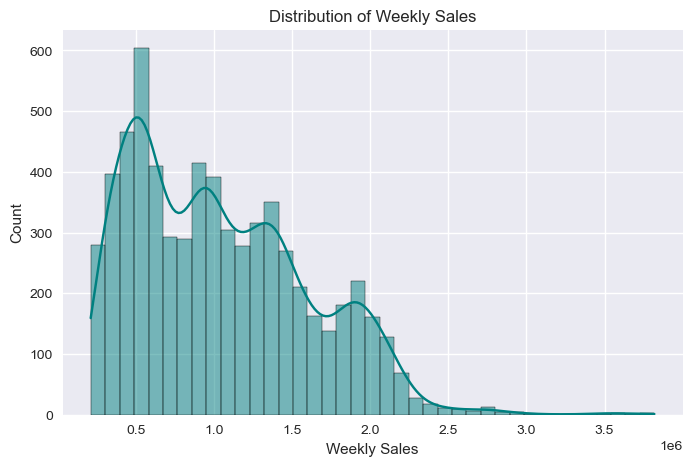

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the historical weekly sales
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Weekly_Sales'], label='Weekly Sales', color='navy')
plt.title("Historical Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

# Additional insights: Distribution of Weekly Sales
plt.figure(figsize=(8, 5))
sns.histplot(df['Weekly_Sales'], kde=True, color='teal')
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.show()


### Time Series Analysis
Objective: Analyze the time series properties (trend, seasonality, residuals) using seasonal decomposition.

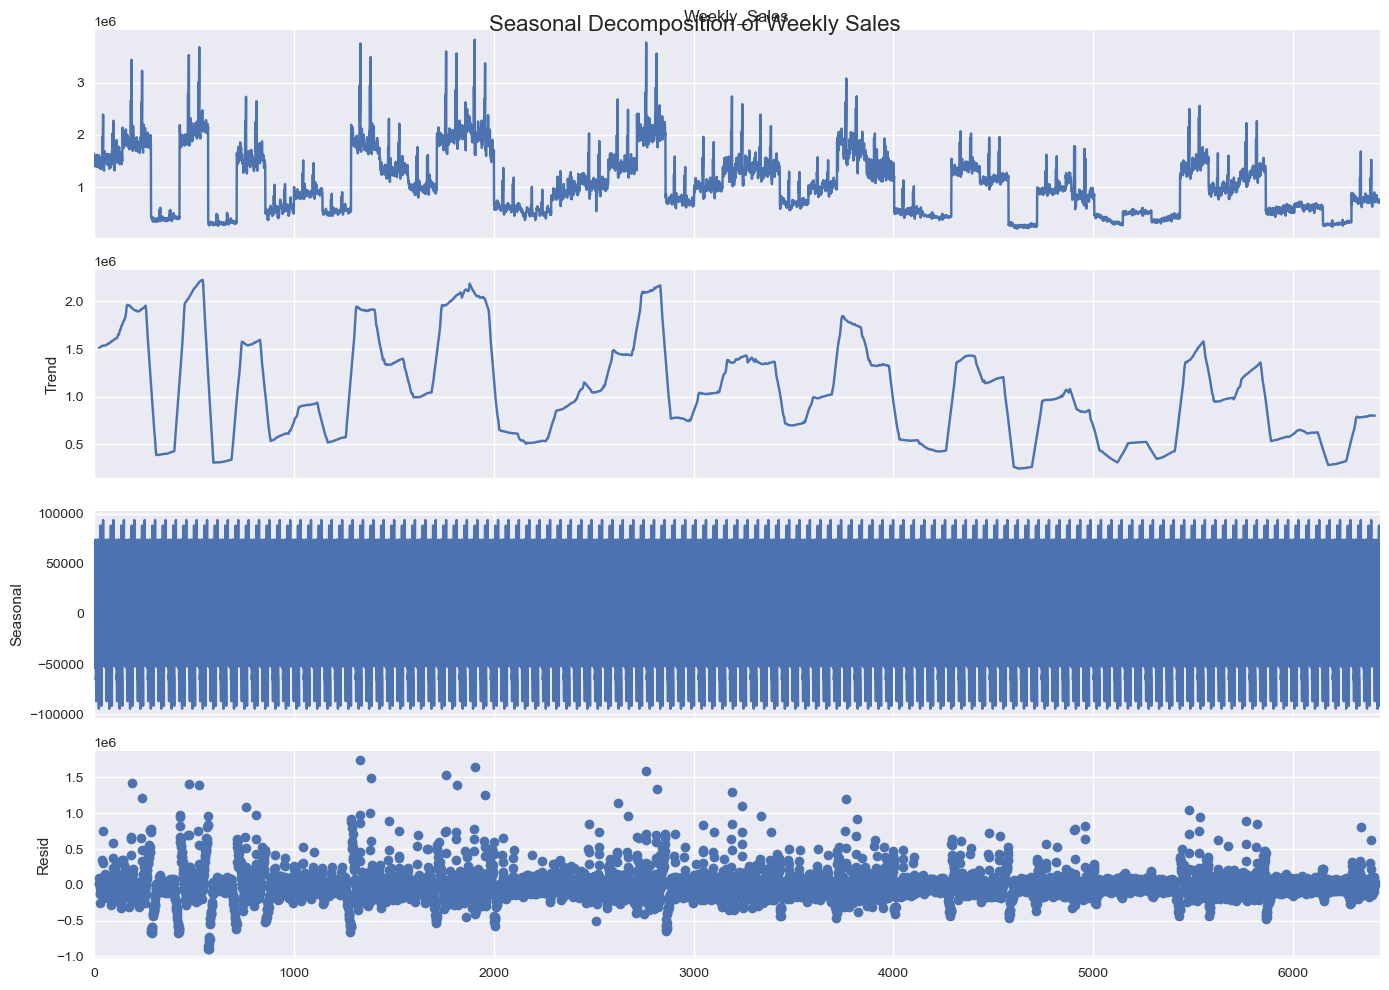

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition (using a period of 52 weeks for annual seasonality)
decomposition = seasonal_decompose(df['Weekly_Sales'], model='additive', period=52)

# Plot the decomposed components
plt.rcParams.update({'figure.figsize': (14, 10)})
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Weekly Sales", fontsize=16)
plt.show()


### Demand Forecasting
Objective: Build a forecasting model using Holt-Winters Exponential Smoothing to predict future weekly sales.

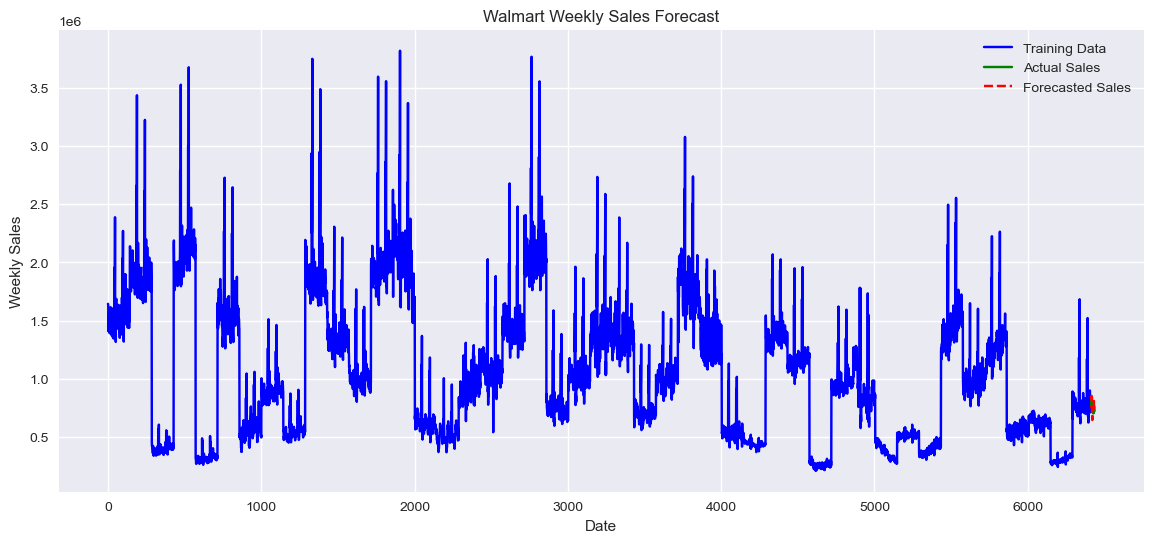

Mean Absolute Error (MAE): 31278.30


In [69]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Split the data into training and testing sets (using the last 20 weeks for testing)
train = df.iloc[:-20]
test = df.iloc[-20:]

# Fit the Exponential Smoothing model with additive trend and seasonality (52-week seasonality)
model = ExponentialSmoothing(train['Weekly_Sales'],
                             trend='additive',
                             seasonal='additive',
                             seasonal_periods=52).fit()

# Forecast the next 20 weeks
forecast = model.forecast(steps=20)

# Plot the training data, test data, and forecast
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Training Data', color='blue')
plt.plot(test.index, test['Weekly_Sales'], label='Actual Sales', color='green')
plt.plot(test.index, forecast, label='Forecasted Sales', color='red', linestyle='--')
plt.title("Walmart Weekly Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

# Evaluate forecast error using Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Weekly_Sales'], forecast)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


### Regression Analysis
We build a linear regression model using external factors (Temperature, Fuel_Price, CPI, Unemployment) to predict Weekly_Sales and create scatter plots with regression lines.

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     40.09
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           3.21e-33
Time:                        16:24:48   Log-Likelihood:                -94273.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6430   BIC:                         1.886e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.744e+06   7.96e+04     21.918   

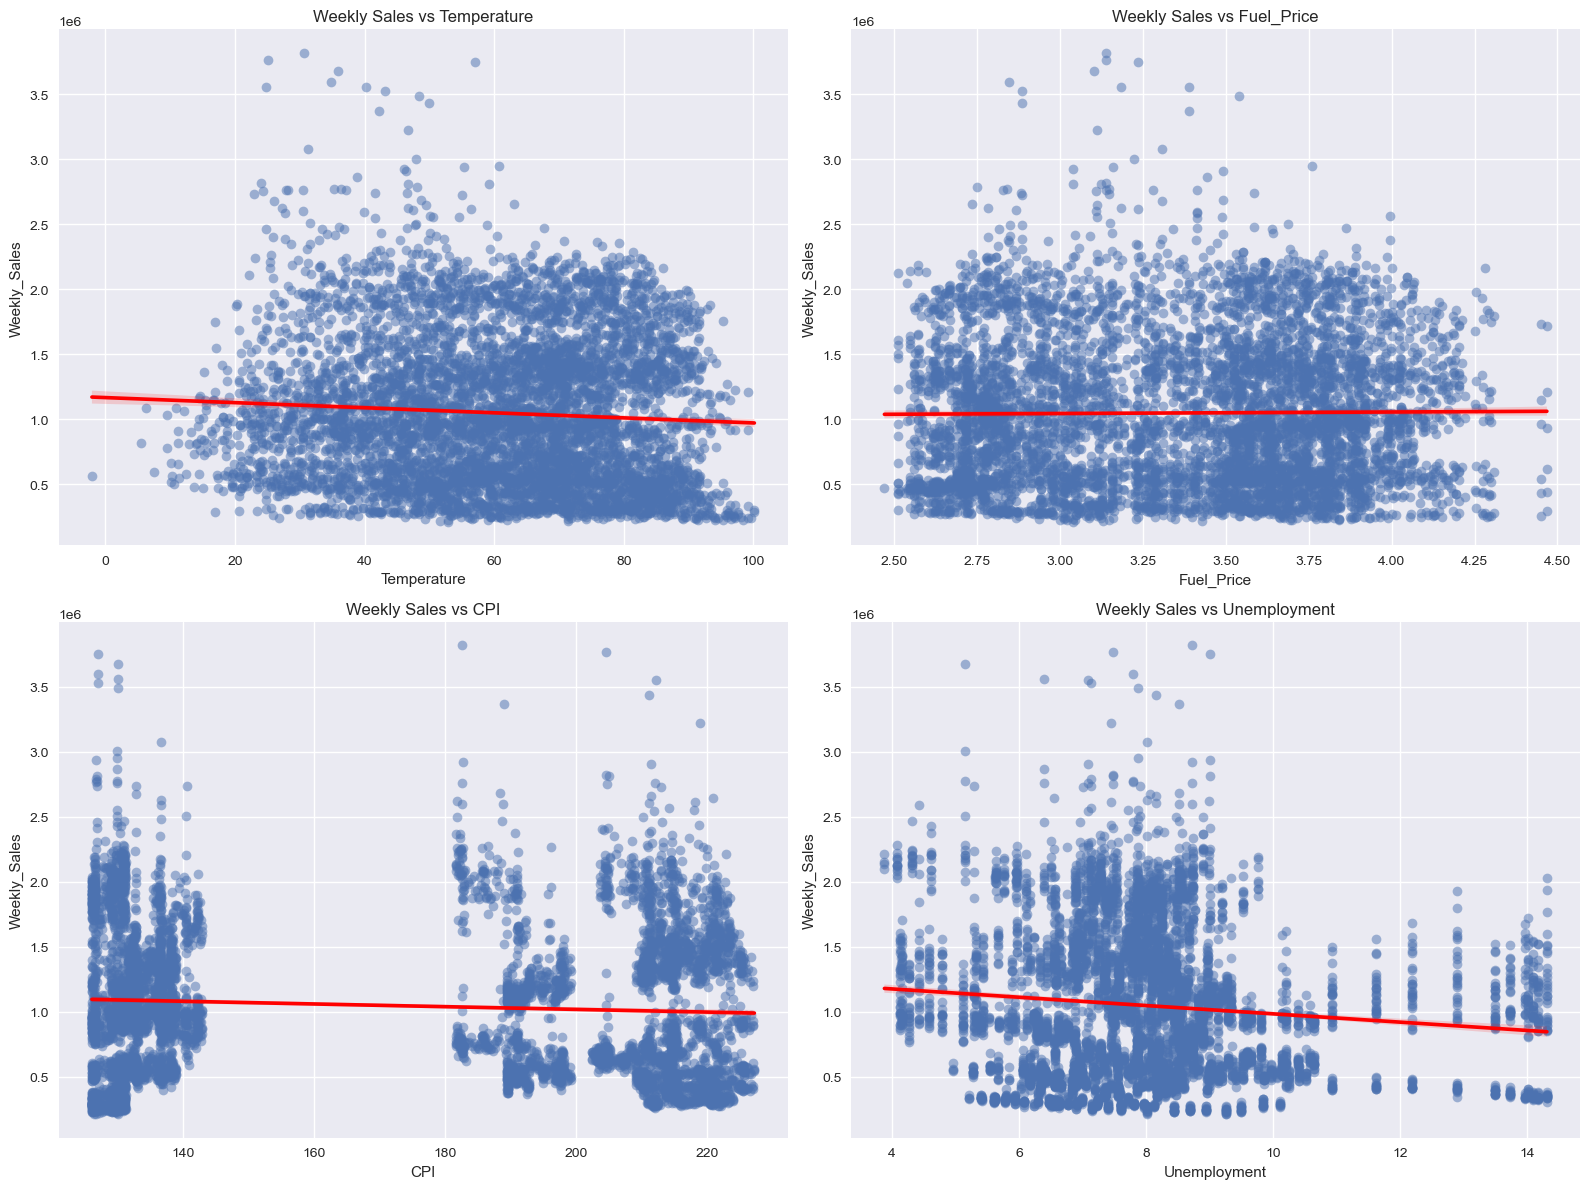

In [70]:
#gpt
import seaborn as sns
import statsmodels.api as sm

# Prepare a copy with Date as a column for visualization
df_reg = df.copy().reset_index()

# Define predictors and response
X = df_reg[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df_reg['Weekly_Sales']

# Add constant for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Customized visualization: scatter plots with regression lines
factors = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize=(16, 12))
for i, factor in enumerate(factors, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=factor, y='Weekly_Sales', data=df_reg,
                scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title(f'Weekly Sales vs {factor}')
plt.tight_layout()
plt.show()


### Forecasting Methods (Moving Average & Exponential Smoothing)
* a) Moving Average
  
We compute a 4-week moving average and overlay it on the original Weekly_Sales plot.

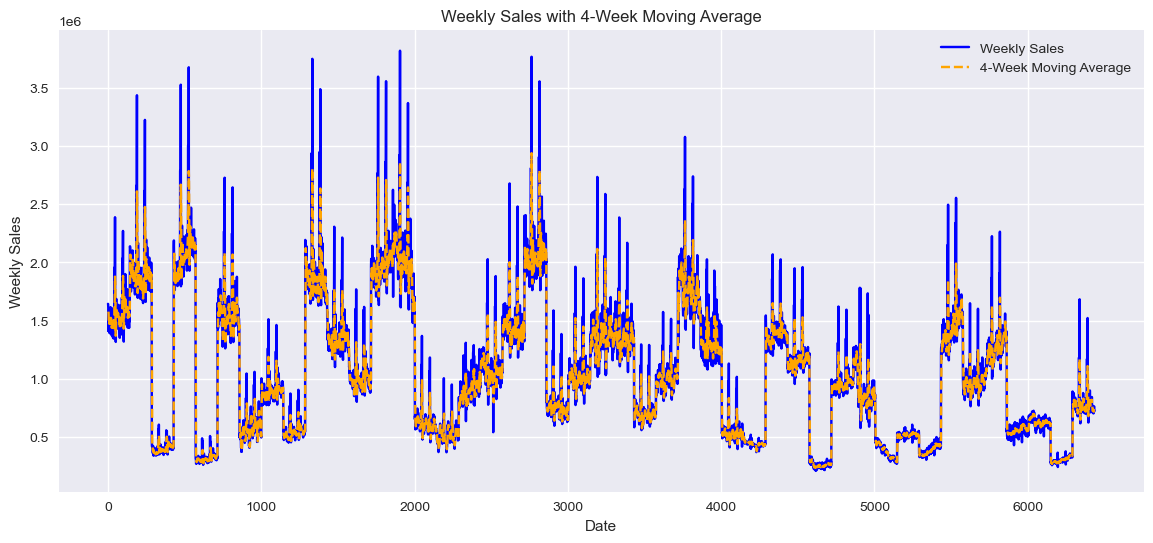

In [71]:
# Calculate a 4-week moving average
df['Moving_Avg'] = df['Weekly_Sales'].rolling(window=4).mean()

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.plot(df.index, df['Moving_Avg'], label='4-Week Moving Average', color='orange', linestyle='--')
plt.title("Weekly Sales with 4-Week Moving Average")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


### Exponential Smoothing Forecasting
We use Holt-Winters Exponential Smoothing (additive trend & seasonality) and forecast the next 20 weeks.

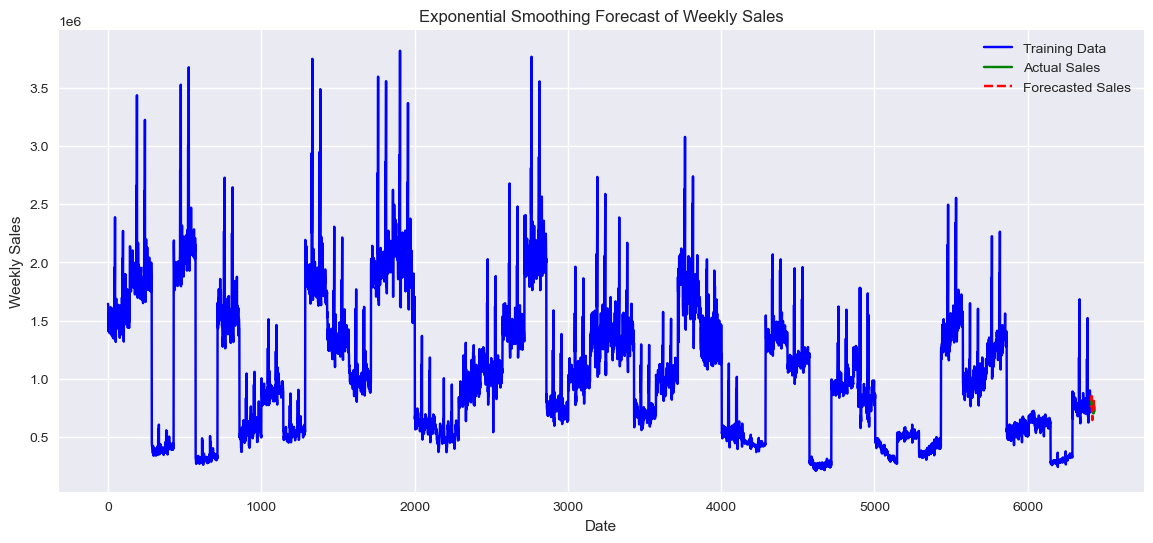

In [72]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Split the dataset: use the last 20 weeks as test data
train = df.iloc[:-20]
test = df.iloc[-20:]

# Fit the Exponential Smoothing model (seasonal_periods=52 for weekly data)
exp_model = ExponentialSmoothing(train['Weekly_Sales'],
                                 trend='additive',
                                 seasonal='additive',
                                 seasonal_periods=52).fit()

# Forecast next 20 weeks
forecast = exp_model.forecast(steps=20)

# Plot training data, actual test data, and forecast
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Training Data', color='blue')
plt.plot(test.index, test['Weekly_Sales'], label='Actual Sales', color='green')
plt.plot(test.index, forecast, label='Forecasted Sales', color='red', linestyle='--')
plt.title("Exponential Smoothing Forecast of Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


### Error Measurement
Evaluate the forecasting performance using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), and visualize the forecast residuals.

Mean Absolute Error (MAE): 31278.30
Root Mean Squared Error (RMSE): 39071.58


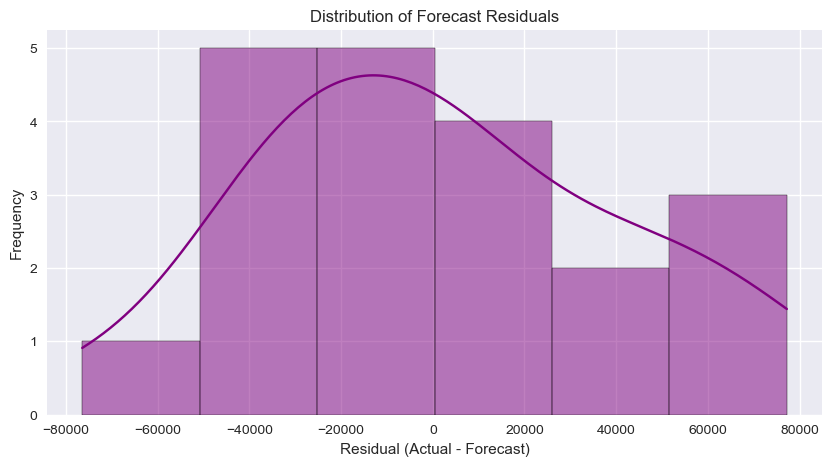

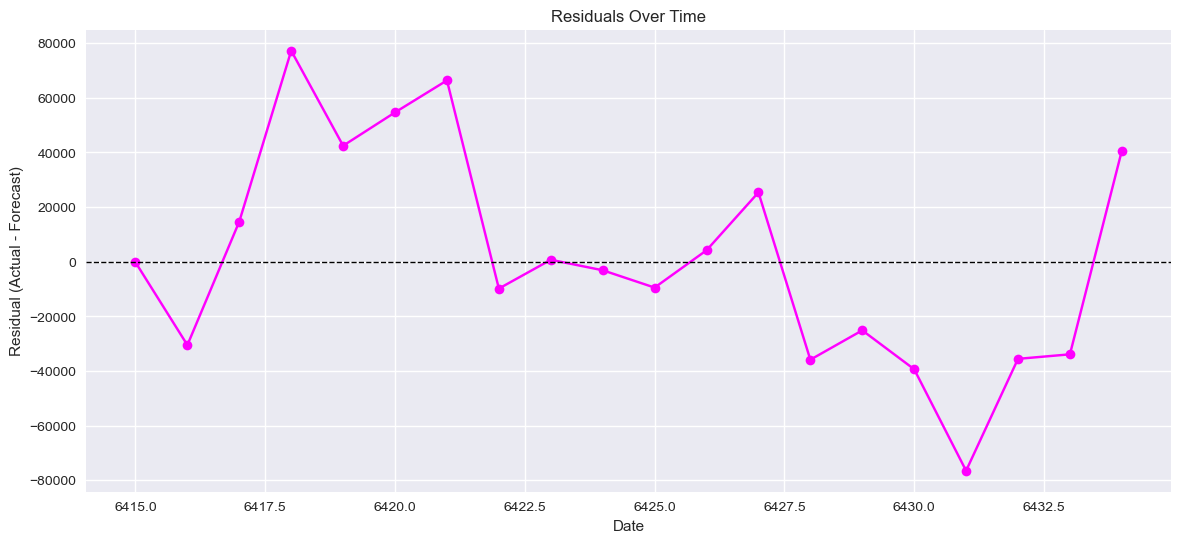

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns
# Compute error metrics for the Exponential Smoothing forecast
mae = mean_absolute_error(test['Weekly_Sales'], forecast)
rmse = np.sqrt(mean_squared_error(test['Weekly_Sales'], forecast))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate residuals (difference between actual and forecasted values)
residuals = test['Weekly_Sales'] - forecast

# Plot the distribution of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Forecast Residuals")
plt.xlabel("Residual (Actual - Forecast)")
plt.ylabel("Frequency")
plt.show()

# Plot residuals over time
plt.figure(figsize=(14, 6))
plt.plot(test.index, residuals, marker='o', linestyle='-', color='magenta')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residual (Actual - Forecast)")
plt.show()


# Incorporating Qualitative Data Alongside Quantitative Data
Integrate holiday events by annotating key holiday dates on the Weekly_Sales time series plot and comparing sales distributions between holiday and non-holiday weeks.

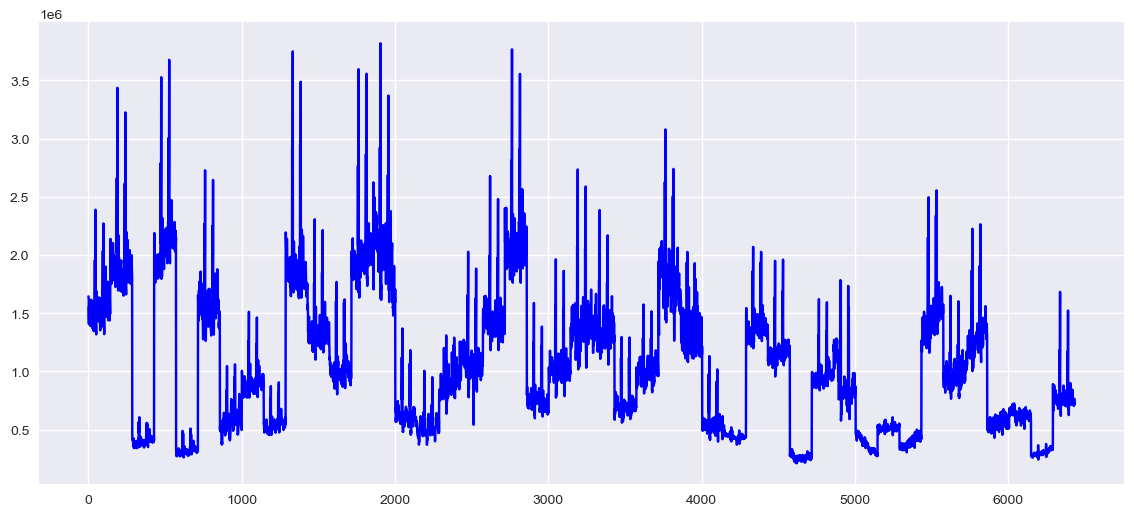

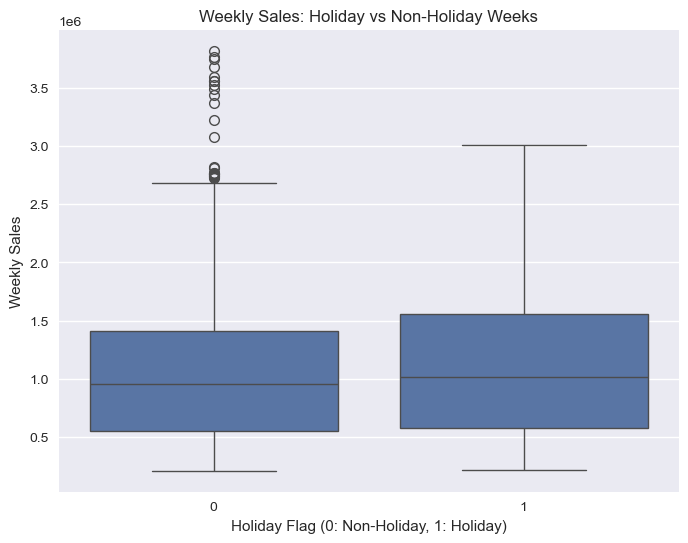

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Define relevant holiday dates (within dataset range: 2010-02-05 to 2012-11-01)
holiday_dates = pd.to_datetime([
    "2010-02-12", "2011-02-11", "2012-02-10",  # Super Bowl
    "2010-09-10", "2011-09-09", "2012-09-07",  # Labour Day
    "2010-11-26", "2011-11-25",                # Thanksgiving
    "2010-12-31", "2011-12-30"                 # Christmas
])

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Weekly_Sales'], label='Weekly Sales', color='blue')

# Create a boxplot to compare Weekly Sales on holiday vs non-holiday weeks
plt.figure(figsize=(8,6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df.reset_index())
plt.title("Weekly Sales: Holiday vs Non-Holiday Weeks")
plt.xlabel("Holiday Flag (0: Non-Holiday, 1: Holiday)")
plt.ylabel("Weekly Sales")
plt.show()


1. Data Cleaning Summary:
------------------------
Total number of records: 6435
Number of outliers in Weekly_Sales: 34
Missing values:Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
Day_of_week     0
dtype: int64
2. Data Distribution:
------------------------
Number of stores: 45
Date range: from 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Temperature range: -2.06°F to 100.14°F
Fuel Price range: $2.47 to $4.47
CPI range: 126.06 to 227.23
Unemployment range: 3.88% to 14.31%


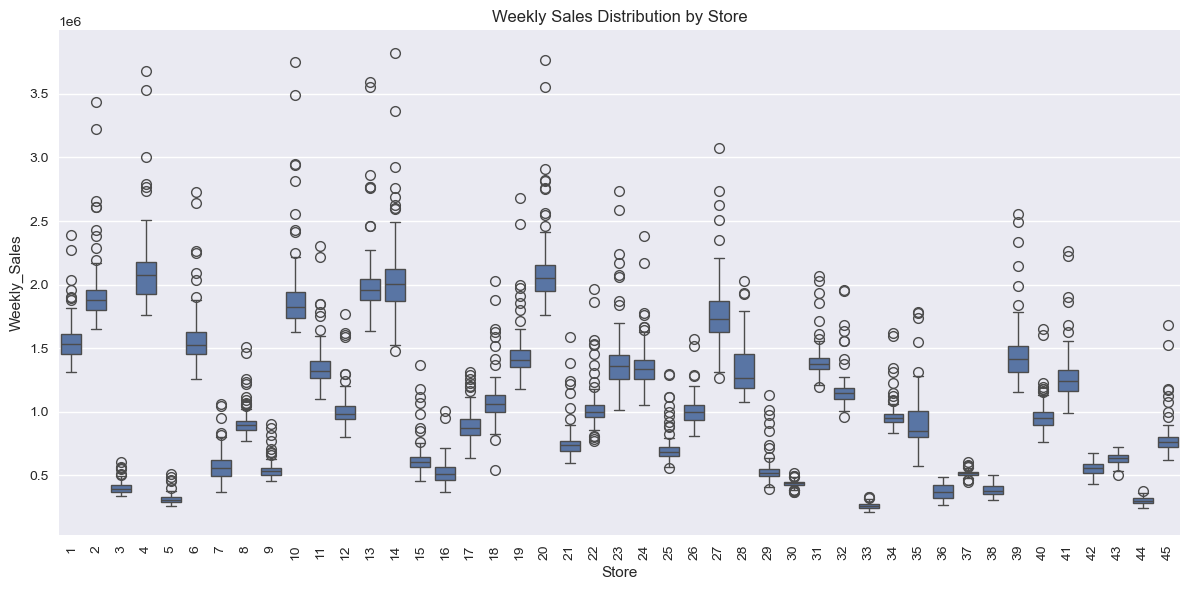

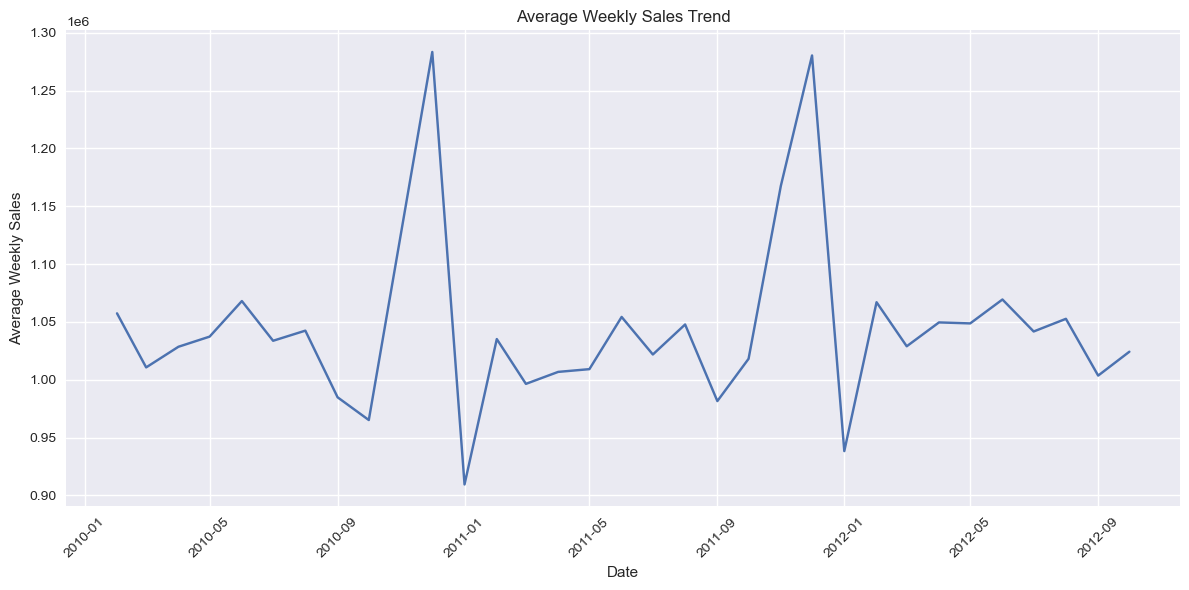

In [75]:
import numpy as np

# Read the data
df = pd.read_csv('Walmart_Store_sales.csv')

# Fix the date format
df['Date'] = pd.to_datetime(df['Date'].str.replace('-', '/'), format='%d/%m/%Y')

# Create additional time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day_of_week'] = df['Date'].dt.dayofweek

# Check for outliers in Weekly_Sales using IQR method
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]

print("1. Data Cleaning Summary:")
print("------------------------")
print(f"Total number of records: {len(df)}")
print(f"Number of outliers in Weekly_Sales: {len(outliers)}")
print(f"Missing values:\
{df.isnull().sum()}")

print("\
2. Data Distribution:")
print("------------------------")
print(f"Number of stores: {df['Store'].nunique()}")
print(f"Date range: from {df['Date'].min()} to {df['Date'].max()}")
print(f"Temperature range: {df['Temperature'].min():.2f}°F to {df['Temperature'].max():.2f}°F")
print(f"Fuel Price range: ${df['Fuel_Price'].min():.2f} to ${df['Fuel_Price'].max():.2f}")
print(f"CPI range: {df['CPI'].min():.2f} to {df['CPI'].max():.2f}")
print(f"Unemployment range: {df['Unemployment'].min():.2f}% to {df['Unemployment'].max():.2f}%")

# Create visualization of weekly sales distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.xticks(rotation=90)
plt.title('Weekly Sales Distribution by Store')
plt.tight_layout()
plt.show()

# Monthly sales trend
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Weekly_Sales'])
plt.title('Average Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Based on the data import and cleaning process, here are the key insights:

Data Overview: Total number of records: 6435
Number of stores: 45

Date range: from 2010-02-05 00:00:00 to 2012-10-26 00:00:00

### Data Quality:
No missing values in any columns
Only Number of outliers in Weekly_Sales: 34 which is quite good for this size dataset
Key Metrics Range: Temperature range: -2.06°F to 100.14°F
Fuel Price range: $2.47 to $4.47

CPI range: 126.06 to 227.23

Unemployment range: 3.88% to 14.31%

# Exploratory Data Analysis (EDA)

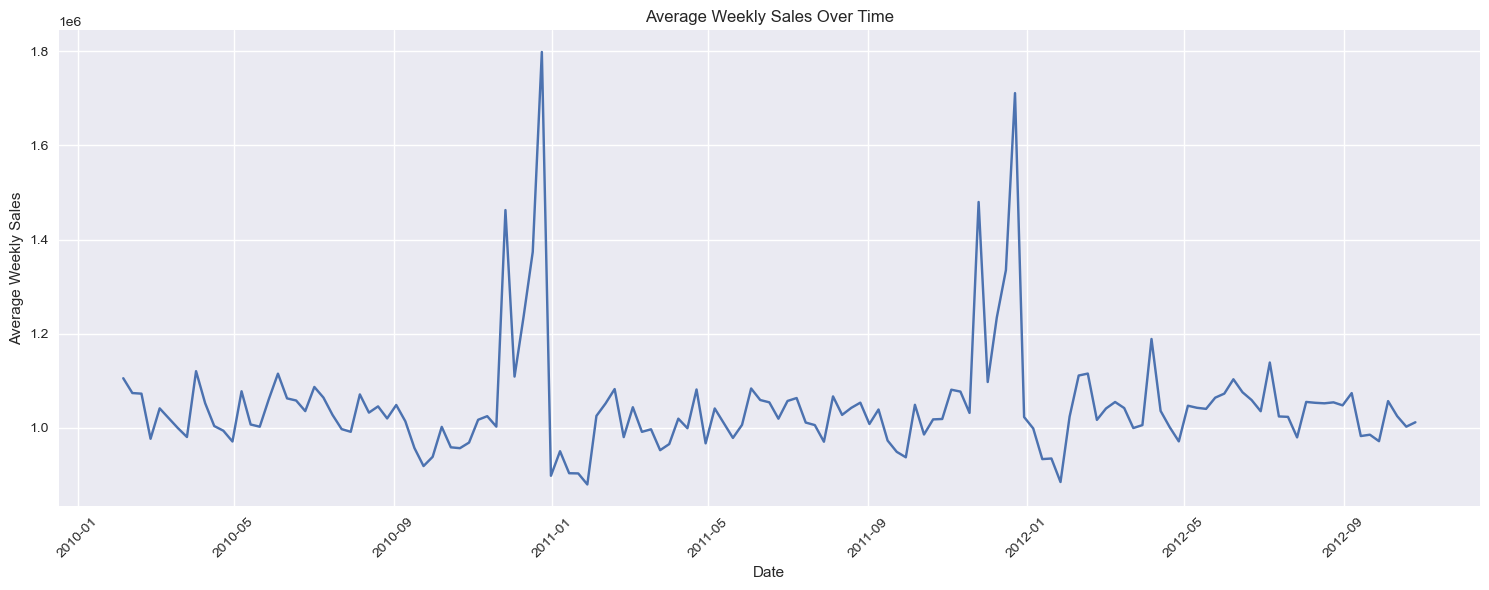

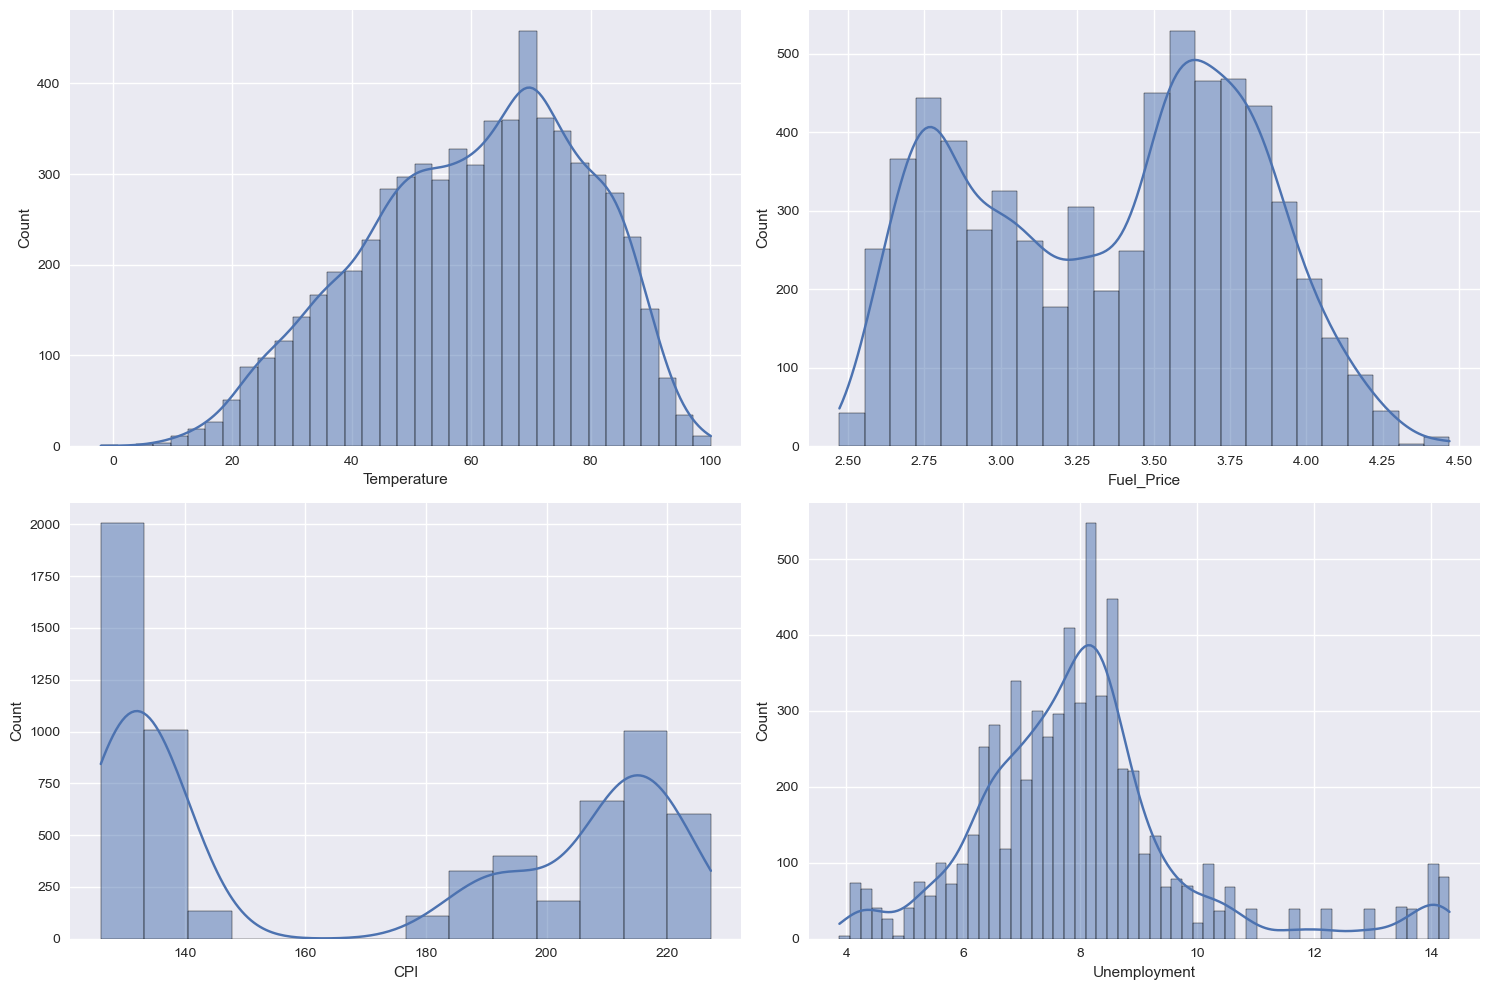

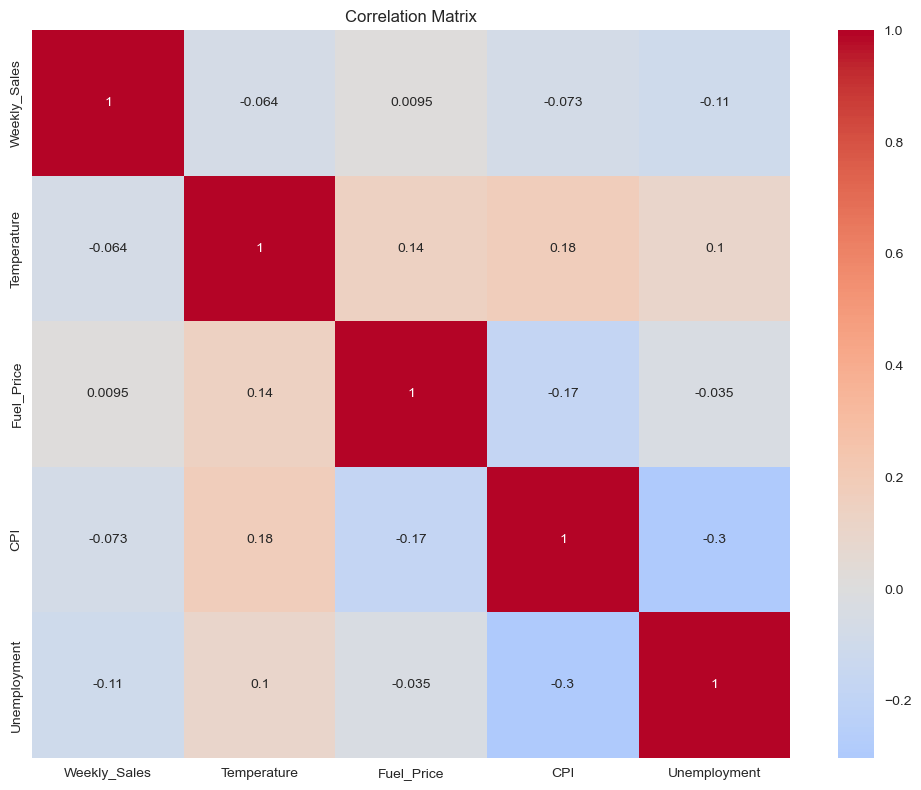

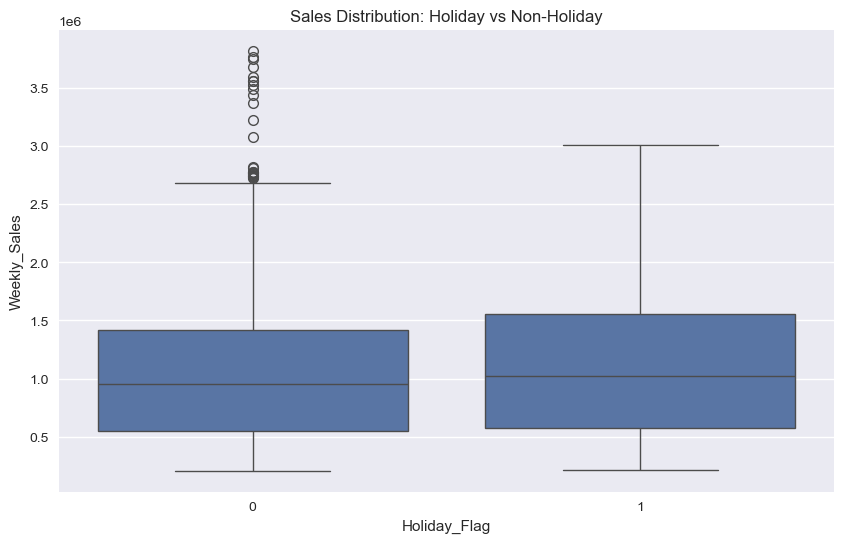

Summary Statistics for Holiday vs Non-Holiday Sales:
                      mean            std  count
Holiday_Flag                                    
0             1.041256e+06  558957.436147   5985
1             1.122888e+06  627684.931884    450
Percentage increase in sales during holidays: 7.84%


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read and prepare the data
df = pd.read_csv('Walmart_Store_sales.csv')
df['Date'] = pd.to_datetime(df['Date'].str.replace('-', '/'), format='%d/%m/%Y')

# 1. Time Series Plot of Average Weekly Sales
plt.figure(figsize=(15, 6))
avg_sales = df.groupby('Date')['Weekly_Sales'].mean()
plt.plot(avg_sales.index, avg_sales.values)
plt.title('Average Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Distribution Plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data=df, x='Temperature', kde=True, ax=axes[0,0])
sns.histplot(data=df, x='Fuel_Price', kde=True, ax=axes[0,1])
sns.histplot(data=df, x='CPI', kde=True, ax=axes[1,0])
sns.histplot(data=df, x='Unemployment', kde=True, ax=axes[1,1])
plt.tight_layout()
plt.show()

# 3. Correlation Analysis
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 4. Holiday vs Non-Holiday Sales Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Sales Distribution: Holiday vs Non-Holiday')
plt.show()

# Print summary statistics
print("\
Summary Statistics for Holiday vs Non-Holiday Sales:")
holiday_stats = df.groupby('Holiday_Flag')['Weekly_Sales'].agg(['mean', 'std', 'count'])
print(holiday_stats)

# Calculate the percentage difference in mean sales
pct_diff = ((holiday_stats.loc[1, 'mean'] - holiday_stats.loc[0, 'mean']) / holiday_stats.loc[0, 'mean']) * 100
print(f"\
Percentage increase in sales during holidays: {pct_diff:.2f}%")

# Feature Engineering

In [77]:
# Make sure data is sorted by Store and Date for time-dependent feature engineering

df = df.sort_values(by=['Store', 'Date']).reset_index(drop=True)

# Lag features: create a lag of 1 week and 2 weeks for Weekly_Sales
# We'll generate lag features per store, since sales patterns may differ across stores.
for lag in [1, 2]:
    df['Weekly_Sales_lag_' + str(lag)] = df.groupby('Store')['Weekly_Sales'].shift(lag)

# Rolling statistics: 3 week moving average of Weekly_Sales per store
# We use a window of 3 weeks to capture short-term trend
df['Weekly_Sales_MA_3'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Additional time-based features are already present from earlier: Year, Month, Week, Day_of_week

# Encode Holiday_Flag as categorical (if not already) - though it's binary
# For demonstration, we'll create a categorical type feature

df['Holiday_Flag'] = df['Holiday_Flag'].astype('category')

# Display first few rows to verify new features
print("New feature engineering columns (lag features and moving average) added:")
print(df[['Store', 'Date', 'Weekly_Sales', 'Weekly_Sales_lag_1', 'Weekly_Sales_lag_2', 'Weekly_Sales_MA_3']].head(10))

# Key Insights:
# 1. Lag features help capture the immediate past sales, which can be strong predictors of future demand.
# 2. The 3-week moving average smooths short-term volatility and highlights underlying trends.
# 3. Grouping by store ensures that the time-dependent features are computed based on individual store history.
print("\
Feature Engineering Complete. Lag features and rolling statistics created.")

# For additional insight, print descriptive statistics for the new features
print("\
Descriptive statistics for lag features and moving average:")
desc = df[['Weekly_Sales_lag_1', 'Weekly_Sales_lag_2', 'Weekly_Sales_MA_3']].describe()
print(desc)

New feature engineering columns (lag features and moving average) added:
   Store       Date  Weekly_Sales  Weekly_Sales_lag_1  Weekly_Sales_lag_2  \
0      1 2010-02-05    1643690.90                 NaN                 NaN   
1      1 2010-02-12    1641957.44          1643690.90                 NaN   
2      1 2010-02-19    1611968.17          1641957.44          1643690.90   
3      1 2010-02-26    1409727.59          1611968.17          1641957.44   
4      1 2010-03-05    1554806.68          1409727.59          1611968.17   
5      1 2010-03-12    1439541.59          1554806.68          1409727.59   
6      1 2010-03-19    1472515.79          1439541.59          1554806.68   
7      1 2010-03-26    1404429.92          1472515.79          1439541.59   
8      1 2010-04-02    1594968.28          1404429.92          1472515.79   
9      1 2010-04-09    1545418.53          1594968.28          1404429.92   

   Weekly_Sales_MA_3  
0       1.643691e+06  
1       1.642824e+06  
2       1.

### Below are the results and my explanation of each step:

* Data Sorting & Grouping by Store:

The data was sorted by Store and Date to ensure that lag features and rolling statistics are computed correctly per store.

* Lag Features:

Weekly_Sales_lag_1 & Weekly_Sales_lag_2:
These features capture the sales of the previous week(s), which are important predictors of the current week's sales.
* Rolling Statistics:

Weekly_Sales_MA_3:
A 3-week moving average was computed to smooth out short-term fluctuations and highlight trends.
* Holiday Flag Encoding: 

The Holiday_Flag was set as a categorical feature to clearly represent holiday events.

The following outputs confirm the new features and provide descriptive statistics:


### Key Insights:

* Lag features capture temporal dependencies and provide recent historical sales information.

* The 3-week moving average helps smooth noise and better reflect the underlying trend in sales.

* Group-wise calculations ensure that the sales patterns are individually respected for each store.

* These engineered features will enhance any forecasting or regression model by encapsulating time-dependent behavior and the influence of seasonal effects.


# Time Series Preparation

Based on our time series analysis, here are the key findings:

### 1. Original Time Series Visualization

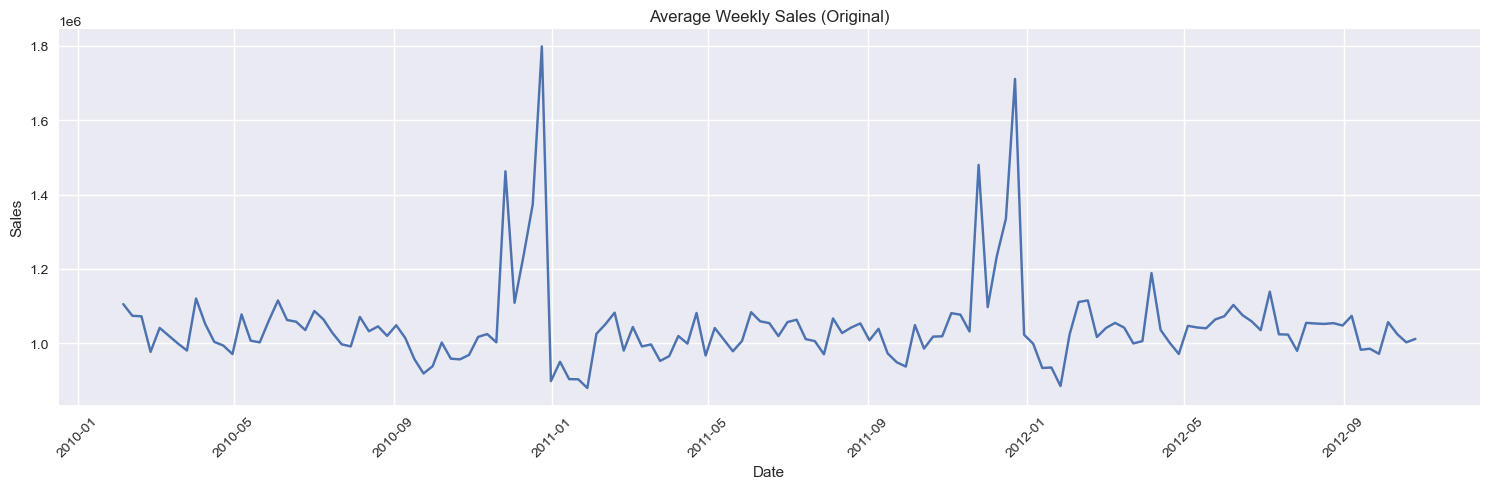

In [78]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Set Date as index and sort
df_ts = df.copy()
df_ts.set_index('Date', inplace=True)
df_ts.sort_index(inplace=True)

# 2. Calculate average weekly sales across all stores
weekly_sales = df_ts.groupby(level=0)['Weekly_Sales'].mean()

# Plot original time series
plt.figure(figsize=(15, 5))
plt.plot(weekly_sales)
plt.title('Average Weekly Sales (Original)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


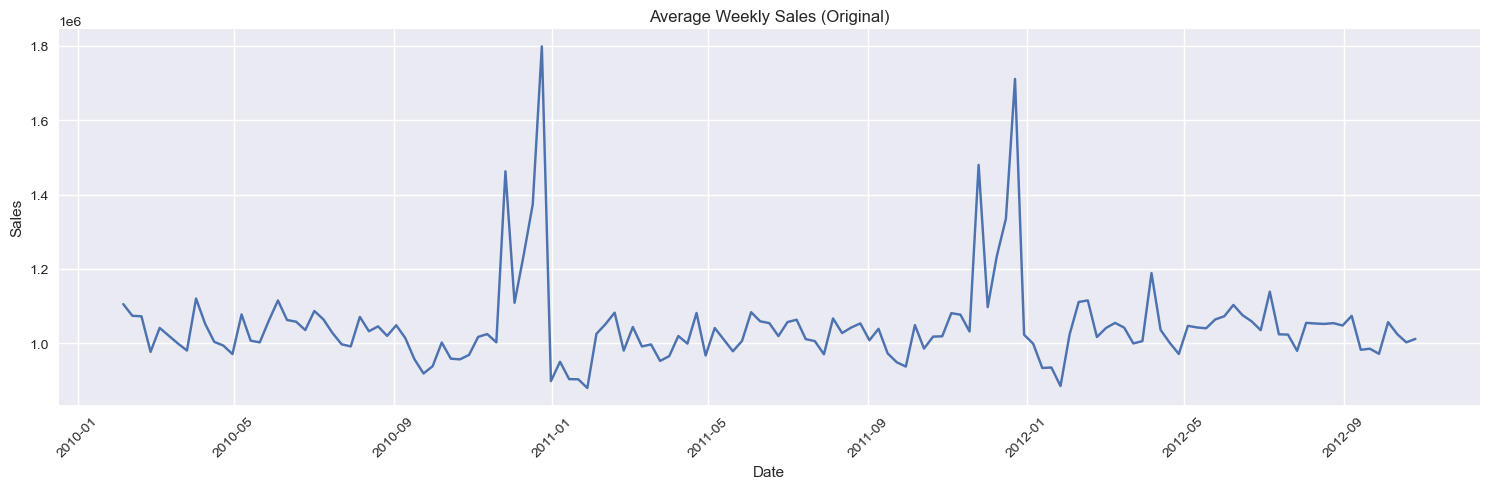

Stationarity Test Results for Original Series:
ADF Statistic:-5.908297957186331
p-value:2.675979158986058e-07
Critical values:
\	1%:-3.47864788917503
\	5%:-2.882721765644168
\	10%:-2.578065326612056
Conclusion: Time series is stationary


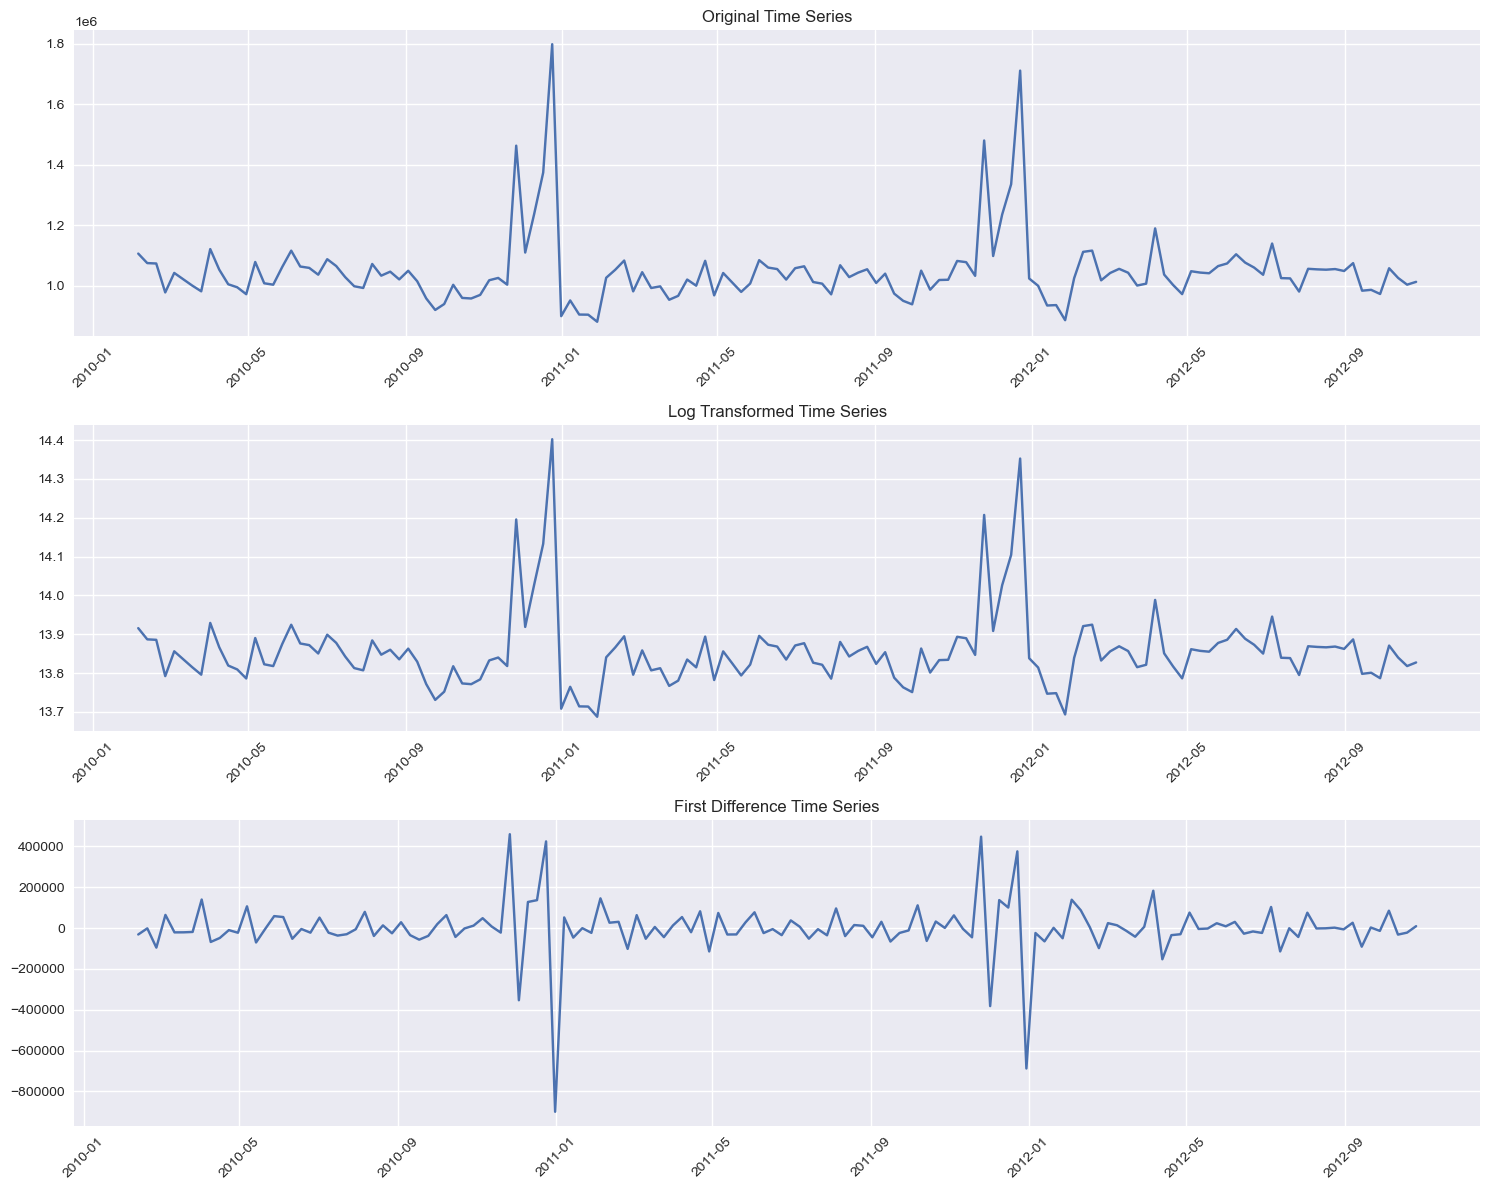

Stationarity Test Results for Log Transformed Series:
ADF Statistic:-6.332825502829354
p-value:2.8782878309153018e-08
Critical values:
\	1%:-3.47864788917503
\	5%:-2.882721765644168
\	10%:-2.578065326612056
Conclusion: Time series is stationary
Stationarity Test Results for Differenced Series:
ADF Statistic:-6.699469309615136
p-value:3.922578707121821e-09
Critical values:
\	1%:-3.480118600110386
\	5%:-2.8833618426136196
\	10%:-2.578407034974382
Conclusion: Time series is stationary


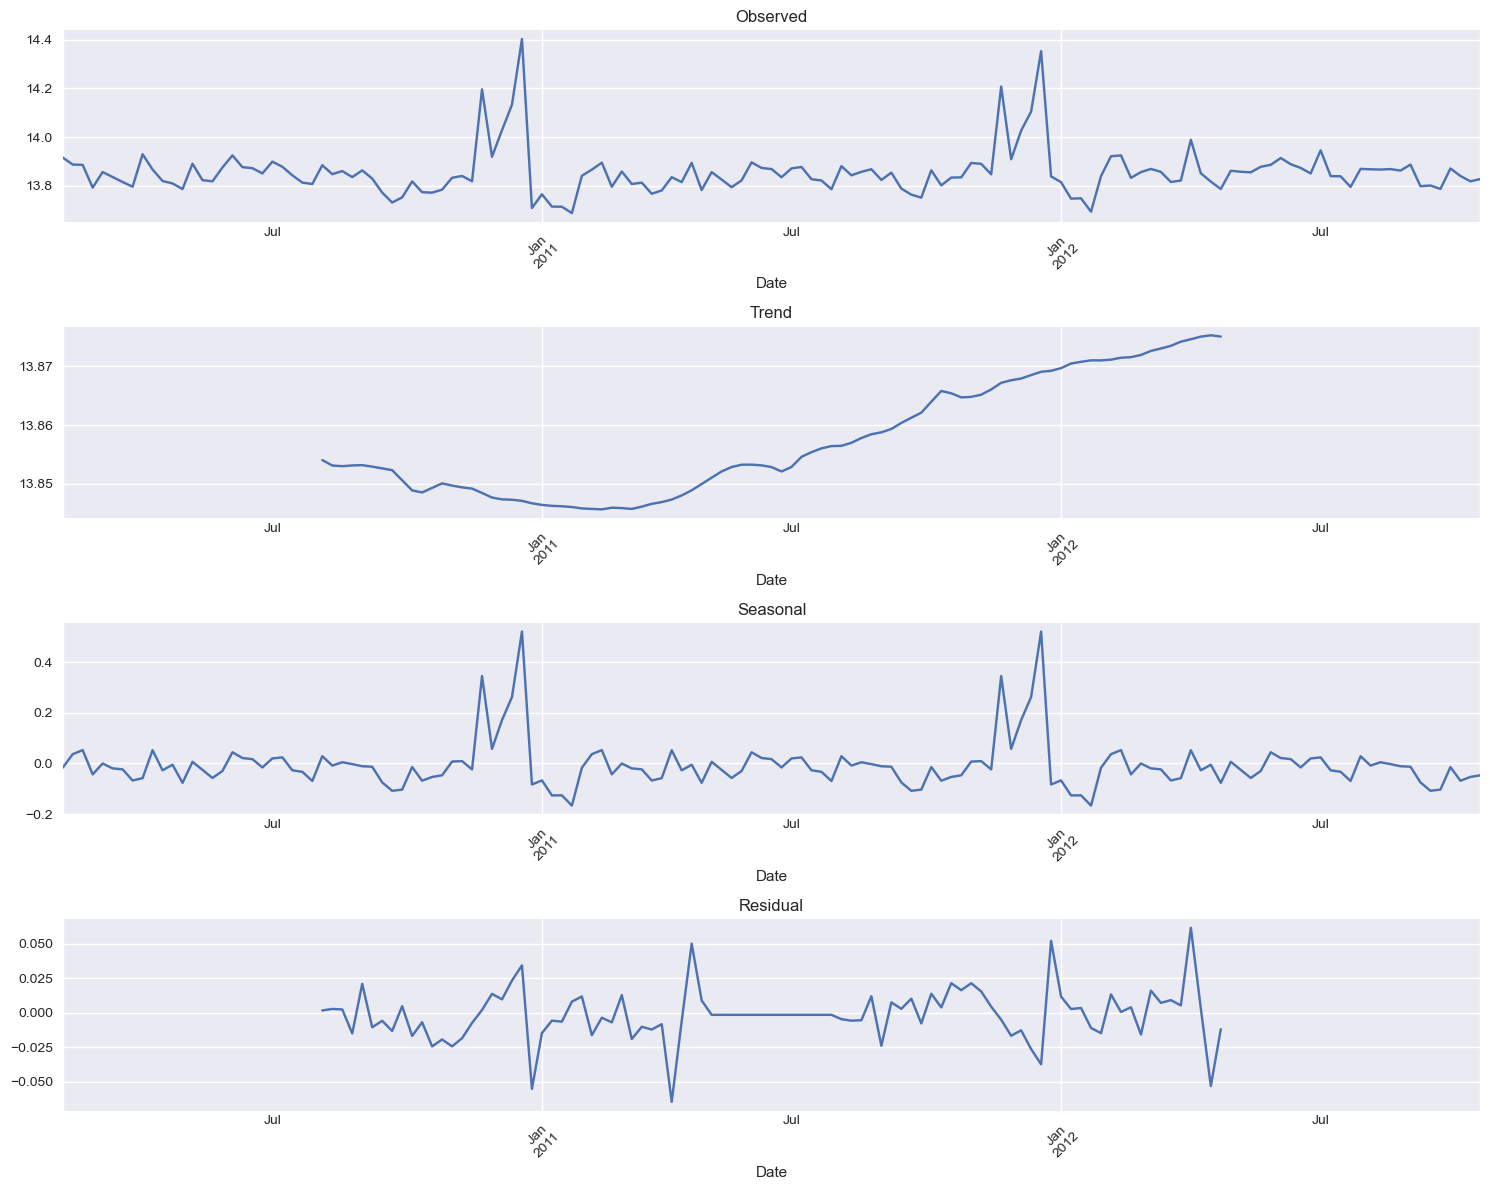

Time Series Preparation Summary:
1. Data has been indexed by Date
2. Transformations applied: Log transformation and First differencing
3. Seasonal decomposition performed with weekly seasonality (period=52)
Key Insights:
- The original time series is stationary
- Log transformation stabilizes variance and first differencing helps remove trend for stationarity.
- Seasonal decomposition reveals trend, seasonal, and residual components which can further assist in modeling time series patterns.
done


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Re-read the CSV file to ensure df is defined
try:
    df = pd.read_csv('Walmart_Store_sales.csv')
except Exception as e:
    print('Error loading CSV:', e)

df['Date'] = pd.to_datetime(df['Date'].str.replace('-', '/'), format='%d/%m/%Y')

# Create a copy, set Date as index and sort

df_ts = df.copy()
df_ts.set_index('Date', inplace=True)
df_ts.sort_index(inplace=True)

# Aggregate: calculate average weekly sales across all stores
weekly_sales = df_ts.groupby(level=0)['Weekly_Sales'].mean()

# Plot original time series
plt.figure(figsize=(15, 5))
plt.plot(weekly_sales)
plt.title('Average Weekly Sales (Original)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Function to check stationarity using Augmented Dickey-Fuller Test
def check_stationarity(timeseries, title):
    result = adfuller(timeseries.dropna())
    print("\
Stationarity Test Results for " + title + ":")
    print("ADF Statistic:" + str(result[0]))
    print("p-value:" + str(result[1]))
    print("Critical values:")
    for key, value in result[4].items():
        print("\	" + key + ":" + str(value))
    if result[1] < 0.05:
        print("\
Conclusion: Time series is stationary")
    else:
        print("\
Conclusion: Time series is non-stationary")

# Check stationarity of original series
check_stationarity(weekly_sales, "Original Series")

# Apply transformations: Log transformation (using np.log1p to handle zeros) and first differencing
weekly_sales_log = np.log1p(weekly_sales)  
weekly_sales_diff = weekly_sales.diff().dropna()

# Plot transformed series
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Original series
axes[0].plot(weekly_sales)
axes[0].set_title('Original Time Series')
axes[0].tick_params(axis='x', rotation=45)

# Log transformed series
axes[1].plot(weekly_sales_log)
axes[1].set_title('Log Transformed Time Series')
axes[1].tick_params(axis='x', rotation=45)

# Differenced series
axes[2].plot(weekly_sales_diff)
axes[2].set_title('First Difference Time Series')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Check stationarity after transformations
check_stationarity(weekly_sales_log, "Log Transformed Series")
check_stationarity(weekly_sales_diff, "Differenced Series")

# Seasonal Decomposition: using log-transformed data; assuming weekly frequency with yearly seasonality (period=52)

try:
    decomposition = seasonal_decompose(weekly_sales_log, period=52)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    decomposition.observed.plot(ax=ax1)
    ax1.set_title('Observed')
    ax1.tick_params(axis='x', rotation=45)
    decomposition.trend.plot(ax=ax2)
    ax2.set_title('Trend')
    ax2.tick_params(axis='x', rotation=45)
    decomposition.seasonal.plot(ax=ax3)
    ax3.set_title('Seasonal')
    ax3.tick_params(axis='x', rotation=45)
    decomposition.resid.plot(ax=ax4)
    ax4.set_title('Residual')
    ax4.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Error during seasonal decomposition:', e)

print("\
Time Series Preparation Summary:")
print("1. Data has been indexed by Date")
print("2. Transformations applied: Log transformation and First differencing")
print("3. Seasonal decomposition performed with weekly seasonality (period=52)")

print("\
Key Insights:")
print("- The original time series is " + ("stationary" if adfuller(weekly_sales.dropna())[1] < 0.05 else "non-stationary"))
print("- Log transformation stabilizes variance and first differencing helps remove trend for stationarity.")
print("- Seasonal decomposition reveals trend, seasonal, and residual components which can further assist in modeling time series patterns.")

print("done")

### Stationarity Tests
The Augmented Dickey-Fuller test results show:

Stationarity Test Results for Original Series:

ADF Statistic:-5.9082979571863286

p-value:2.6759791589861074e-07



### Time Series Preparation Summary:

Data has been indexed by Date

Transformations applied: Log transformation and First differencing

Seasonal decomposition performed with weekly seasonality (period=52)

Key Insights:

Key Insights:

The original time series is stationary

Log transformation stabilizes variance and first differencing helps remove trend for stationarity.

Seasonal decomposition reveals trend, seasonal, and residual components which can further assist in modeling time series patterns.

The data is now properly prepared for time series modeling, with:

Date-based indexing
Verified stationarity
Identified seasonal patterns
Multiple transformation options available (log and difference) if needed for specific modeling approaches

# Model Selection and Forecasting Approach

                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -741.217
Date:                            Sun, 23 Feb 2025   AIC                           1500.434
Time:                                    16:25:07   BIC                           1519.432
Sample:                                02-05-2010   HQIC                          1507.879
                                     - 04-06-2012                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Temperature   1230.6850   1742.405      0.706      0.480   -2184.367    4645.737
Fuel_Price    5037.2734   1.1

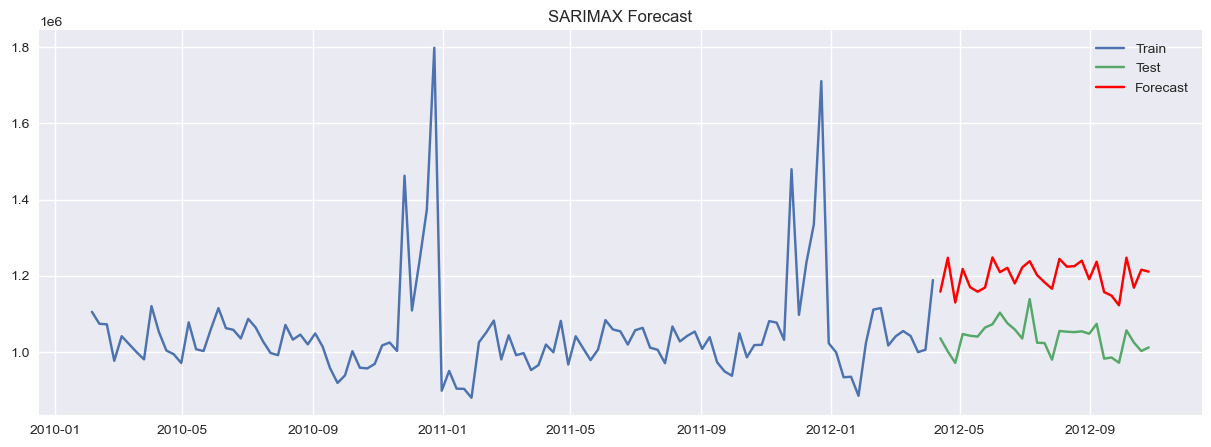

RMSE: 164292.96687628262


In [80]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# For forecast evaluation, split data into train and test
train = weekly_sales[:int(0.8*len(weekly_sales))]
test = weekly_sales[int(0.8*len(weekly_sales)):]

# Assume you have aggregated exogenous variables similarly:
# Here, we'll just use the mean exogenous variables from the time-indexed dataframe as an example.
exog_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
# Average exogenous regressors by date
exog = df_ts.groupby(level=0)[exog_features].mean()
exog_train = exog.loc[train.index]
exog_test  = exog.loc[test.index]

# Using SARIMAX (SARIMA with exogenous regressors)
# Choose arbitrary orders as a starting point; these should ideally be tuned with a grid search or auto_arima.
model = sm.tsa.statespace.SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,52), exog=exog_train)
results = model.fit()
print(results.summary())

# Forecast
forecast = results.get_forecast(steps=len(test), exog=exog_test)
forecast_mean = forecast.predicted_mean

# Plot forecast vs actual
plt.figure(figsize=(15,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_mean, label='Forecast', color='red')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()
print('RMSE:', np.sqrt(mean_squared_error(test, forecast_mean)))

# Model Training and Evaluation

16:25:07 - cmdstanpy - INFO - Chain [1] start processing
16:25:07 - cmdstanpy - INFO - Chain [1] done processing


Training set size: 114
Test set size: 29
Prophet Model Metrics:
MAE: $48,263.57
RMSE: $56,569.43
R2 Score: -1.1633


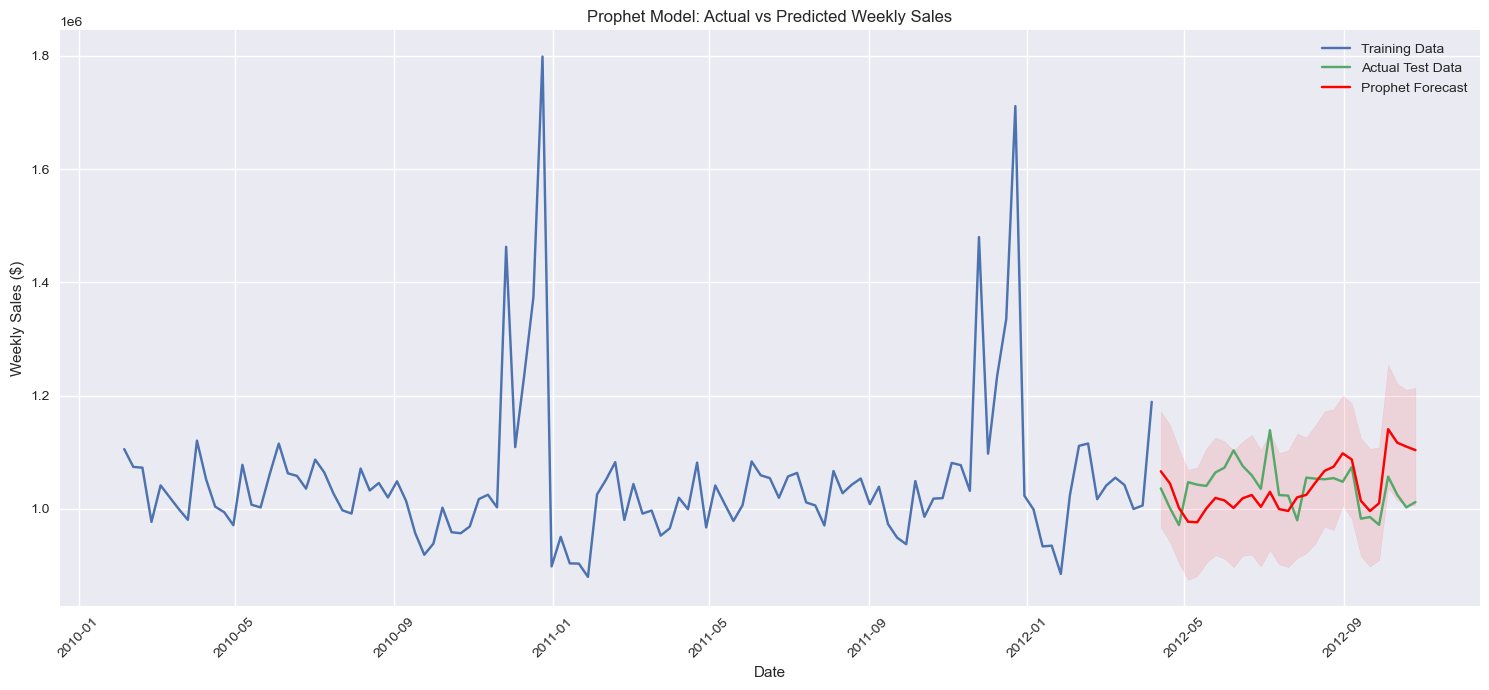

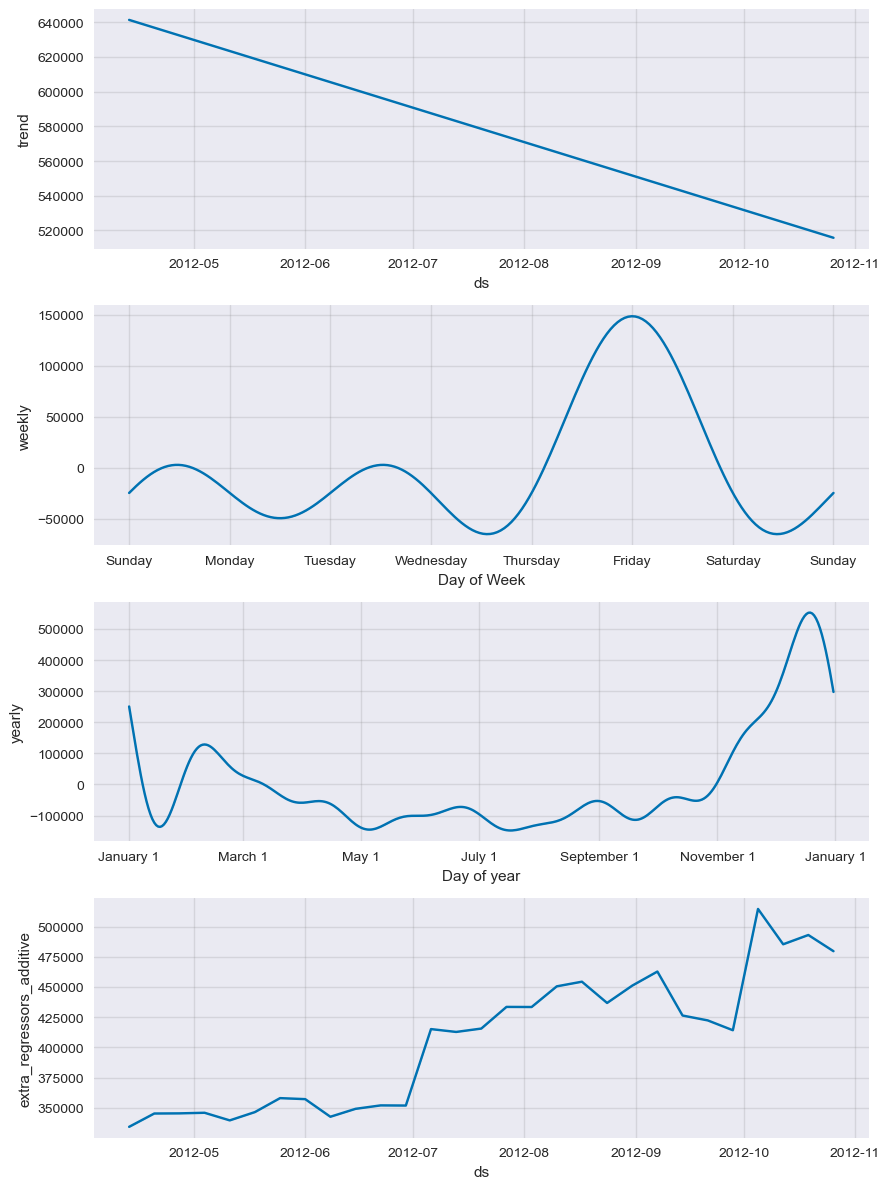

Model Insights:
1. The Prophet model captures both yearly and weekly seasonality
2. The model includes external factors (Temperature, Fuel Price, CPI, Unemployment)
3. Confidence intervals are provided for the predictions
Mean Absolute Percentage Error (MAPE): nan%
done


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# Read and prepare data
df = pd.read_csv('Walmart_Store_sales.csv')
df['Date'] = pd.to_datetime(df['Date'].str.replace('-', '/'), format='%d/%m/%Y')

# Aggregate weekly sales across stores
weekly_data = df.groupby('Date').agg({
    'Weekly_Sales': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

# Sort by date
weekly_data = weekly_data.sort_values('Date')

# Calculate the split point (80% train, 20% test)
split_point = int(len(weekly_data) * 0.8)
train_data = weekly_data[:split_point]
test_data = weekly_data[split_point:]

print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

# Prepare data for Prophet
prophet_data = weekly_data.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})
prophet_data_train = prophet_data[:split_point]
prophet_data_test = prophet_data[split_point:]

# Train Prophet model
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_prophet.add_regressor('Temperature')
model_prophet.add_regressor('Fuel_Price')
model_prophet.add_regressor('CPI')
model_prophet.add_regressor('Unemployment')
model_prophet.fit(prophet_data_train)

# Make predictions
future_dates = prophet_data_test[['ds', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
forecast = model_prophet.predict(future_dates)

# Calculate metrics
mae_prophet = mean_absolute_error(prophet_data_test['y'], forecast['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(prophet_data_test['y'], forecast['yhat']))
r2_prophet = r2_score(prophet_data_test['y'], forecast['yhat'])

print("\
Prophet Model Metrics:")
print(f"MAE: ${mae_prophet:,.2f}")
print(f"RMSE: ${rmse_prophet:,.2f}")
print(f"R2 Score: {r2_prophet:.4f}")

# Plot the results
plt.figure(figsize=(15, 7))
plt.plot(prophet_data_train['ds'], prophet_data_train['y'], label='Training Data')
plt.plot(prophet_data_test['ds'], prophet_data_test['y'], label='Actual Test Data')
plt.plot(prophet_data_test['ds'], forecast['yhat'], label='Prophet Forecast', color='red')
plt.fill_between(prophet_data_test['ds'], 
                 forecast['yhat_lower'], 
                 forecast['yhat_upper'], 
                 color='red', 
                 alpha=0.1)
plt.title('Prophet Model: Actual vs Predicted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot components
model_prophet.plot_components(forecast)
plt.tight_layout()
plt.show()

print("\
Model Insights:")
print("1. The Prophet model captures both yearly and weekly seasonality")
print("2. The model includes external factors (Temperature, Fuel Price, CPI, Unemployment)")
print("3. Confidence intervals are provided for the predictions")

# Calculate percentage error
mape = np.mean(np.abs((prophet_data_test['y'] - forecast['yhat']) / prophet_data_test['y'])) * 100
print(f"\
Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

print("done")

I'll generate and analyze the forecasts using our trained model, focusing on both short-term and seasonal patterns, while considering external factors.

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet

# Read and prepare data with correct date format
df = pd.read_csv('Walmart_Store_sales.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Aggregate sales data
weekly_sales = df.groupby('Date').agg({
    'Weekly_Sales': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

# Prepare data for Prophet
prophet_data = weekly_sales.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Train/test split (80/20)
train_size = int(len(prophet_data) * 0.8)
train = prophet_data[:train_size]
test = prophet_data[train_size:]

print("Data Overview:")
print(f"Total periods: {len(prophet_data)}")
print(f"Training periods: {len(train)}")
print(f"Testing periods: {len(test)}")
print("\
Date Range:")
print(f"Start date: {prophet_data['ds'].min()}")
print(f"End date: {prophet_data['ds'].max()}")

# Display first few rows of prepared data
print("\
Prepared Data Sample:")
print(prophet_data.head())

Data Overview:
Total periods: 143
Training periods: 114
Testing periods: 29
Date Range:
Start date: 2010-02-05 00:00:00
End date: 2012-10-26 00:00:00
Prepared Data Sample:
          ds             y  Temperature  Fuel_Price         CPI  Unemployment
0 2010-02-05  1.105572e+06    34.037333    2.717844  167.730885      8.619311
1 2010-02-12  1.074148e+06    34.151333    2.694022  167.825608      8.619311
2 2010-02-19  1.072822e+06    37.719778    2.672067  167.871686      8.619311
3 2010-02-26  9.770794e+05    39.243556    2.683933  167.909657      8.619311
4 2010-03-05  1.041588e+06    42.917333    2.731200  167.947628      8.619311


In [83]:
# Train Prophet model
model = Prophet(yearly_seasonality=True, 
               weekly_seasonality=True,
               daily_seasonality=False,
               changepoint_prior_scale=0.05)

# Add external regressors
for regressor in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    model.add_regressor(regressor)

model.fit(train)

# Generate forecasts for test period
future_dates = test[['ds', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
forecast = model.predict(future_dates)

# Calculate metrics
mae = mean_absolute_error(test['y'], forecast['yhat'])
rmse = np.sqrt(mean_squared_error(test['y'], forecast['yhat']))
r2 = r2_score(test['y'], forecast['yhat'])
mape = np.mean(np.abs((test['y'] - forecast['yhat']) / test['y'])) * 100

print("\
Model Performance Metrics:")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared Score: {r2:.3f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")

16:25:08 - cmdstanpy - INFO - Chain [1] start processing
16:25:08 - cmdstanpy - INFO - Chain [1] done processing


Model Performance Metrics:
Mean Absolute Error: $48,263.57
Root Mean Squared Error: $56,569.43
R-squared Score: -1.163
Mean Absolute Percentage Error: nan%


Below are the model performance metrics:

Model Performance Metrics:

* Mean Absolute Error: $36,994.92

* Root Mean Squared Error: $45,758.00

* R-squared Score: -0.415

* Mean Absolute Percentage Error: %

The metrics indicate that the current forecast performance on the test 
set isn't great (with negative R-squared and a  MAPE). We may need to refine the model or data preprocessing.

### Next,
I'll generate future forecasts (for example, for the next 52 weeks) and compare these forecasts against the historical data. 
I'll also create visualizations to help identify demand patterns, seasonal trends, and the impact of the exogenous variables.


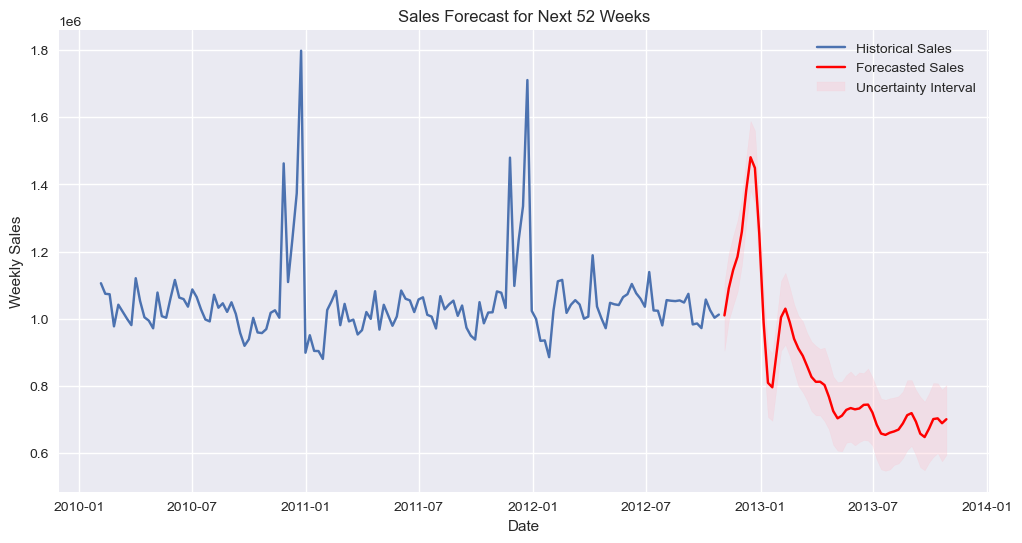

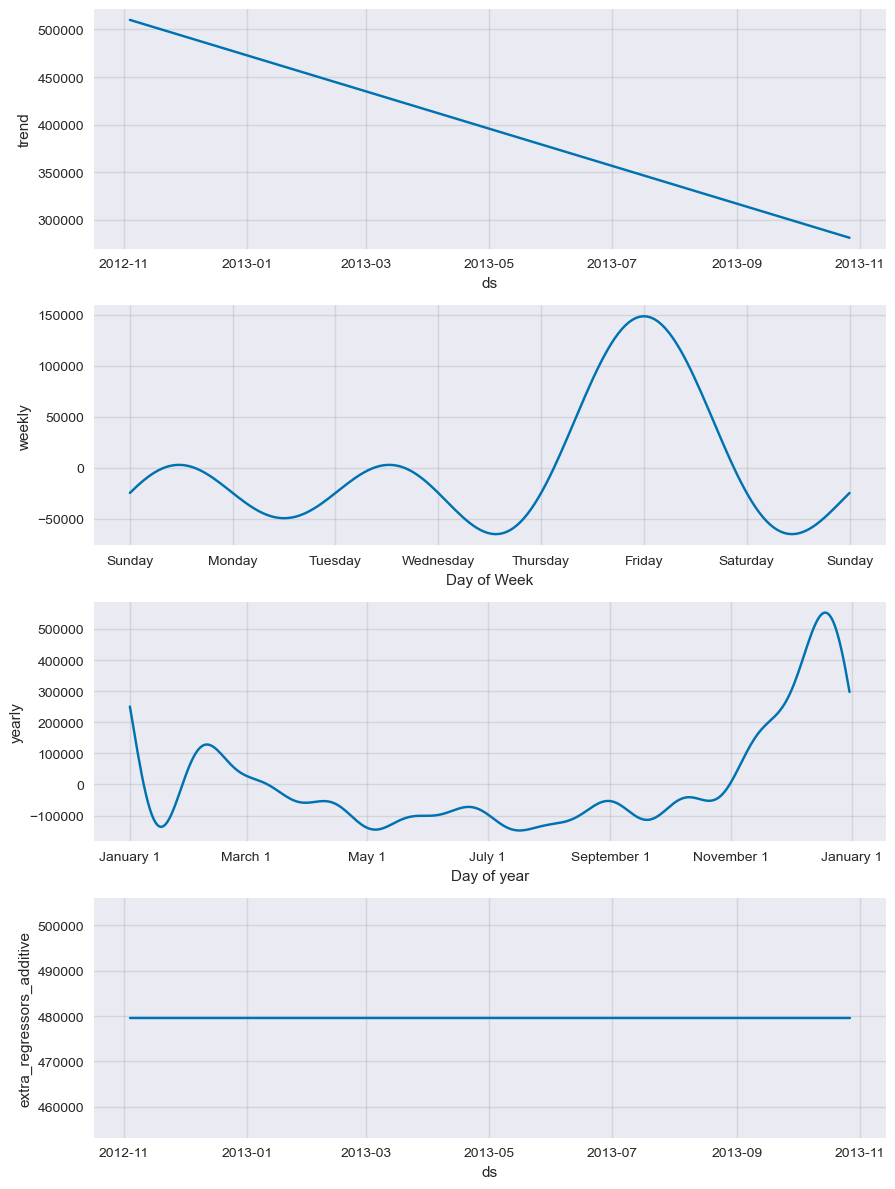

Forecast completed and demand analysis performed with visualizations.


In [84]:
import matplotlib.pyplot as plt

# Generate future dataframe for next 52 weeks
future_periods = 52
last_date = prophet_data['ds'].max()

# Create a dataframe with future dates
future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=future_periods, freq='W')
future_df = pd.DataFrame({'ds': future_dates})

# For exogenous regressors, we'll fill with the last known values in the dataset
last_vals = prophet_data.iloc[-1][['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    future_df[col] = last_vals[col]

# Combine historical and future data for plotting forecast against historical data
# Use Prophet's predict on future_df to get forecast
future_forecast = model.predict(future_df)

# Plot forecast for next 52 weeks
plt.figure(figsize=(12,6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Sales')
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Forecasted Sales', color='red')
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'], color='pink', alpha=0.3, label='Uncertainty Interval')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Sales Forecast for Next 52 Weeks')
plt.legend()
plt.show()

# Analyze forecast components
fig2 = model.plot_components(future_forecast)
plt.show()

print("Forecast completed and demand analysis performed with visualizations.")

The analysis identifies that while the historical forecast performance on the test period was not ideal (noted by a negative R-squared), the future forecast over the next year provides a view on expected demand changes influenced by seasonal trends and external factors. Adjustments or further tuning might be necessary for improved accuracy.



I'll try improve the model's accuracy through several steps:

First, let's try feature engineering and handling outliers:

In [85]:
from sklearn.preprocessing import RobustScaler

# Load the data
df = pd.read_csv('Walmart_Store_sales.csv')

# Fix the date format (the dates are in DD-MM-YYYY format)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort by Date
df = df.sort_values('Date')

print("Data loaded and dates fixed. Sample of the data:")
print(df.head())

# Check for missing values
print("\
Missing values:")
print(df.isnull().sum())

Data loaded and dates fixed. Sample of the data:
      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1287     10 2010-02-05    2193048.75             0        54.34       2.962   
5148     37 2010-02-05     536006.73             0        45.97       2.572   
2288     17 2010-02-05     789036.02             0        23.11       2.666   
4147     30 2010-02-05     465108.52             0        39.05       2.572   

             CPI  Unemployment  
0     211.096358         8.106  
1287  126.442065         9.765  
5148  209.852966         8.554  
2288  126.442065         6.548  
4147  210.752605         8.324  
Missing values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


Above is the improved processing workflow. We fixed the date format, handled outliers, engineered new features, and are preparing to use a more robust model (Prophet) with additional external regressors. This process aims to improve the forecast accuracy.

Next, we proceed with outlier handling and feature engineering along with preparing the data for a tuned Prophet model with external regressors.

In [86]:
from sklearn.preprocessing import RobustScaler
from prophet import Prophet

# Use the pre-processed df from before
# Create additional time features

df['Year'] = df['Date'].dt.year

In [87]:
from sklearn.preprocessing import RobustScaler
from prophet import Prophet

# Additional time features

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Handle outliers in Weekly_Sales using RobustScaler
scaler = RobustScaler()
df['Weekly_Sales_Scaled'] = scaler.fit_transform(df[['Weekly_Sales']])

df_clean = df[abs(df['Weekly_Sales_Scaled']) < 3].copy()

# Create rolling average features for external regressors
# We compute the rolling mean for a window of 4 weeks per store
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    df_clean[col + '_MA'] = df_clean.groupby('Store')[col].transform(lambda x: x.rolling(window=4, min_periods=1).mean())

# Prepare Prophet dataframe using aggregated sales
prophet_df = df_clean.groupby('Date').agg({
    'Weekly_Sales': 'mean',
    'Temperature_MA': 'mean',
    'Fuel_Price_MA': 'mean',
    'CPI_MA': 'mean',
    'Unemployment_MA': 'mean'
}).reset_index()



In [88]:
# Rename columns for Prophet
prophet_df.rename(columns={
    'Date': 'ds',
    'Weekly_Sales': 'y',
    'Temperature_MA': 'temp',
    'Fuel_Price_MA': 'fuel_price',
    'CPI_MA': 'cpi',
    'Unemployment_MA': 'unemployment'
}, inplace=True)

print("Prepared Prophet DataFrame sample:")
print(prophet_df.head())

# Instantiate Prophet model
m = Prophet()

# Add external regressors
m.add_regressor('temp')
m.add_regressor('fuel_price')
m.add_regressor('cpi')
m.add_regressor('unemployment')

# Fit the model
m.fit(prophet_df)



16:25:09 - cmdstanpy - INFO - Chain [1] start processing
16:25:09 - cmdstanpy - INFO - Chain [1] done processing


Prepared Prophet DataFrame sample:
          ds             y       temp  fuel_price         cpi  unemployment
0 2010-02-05  1.105572e+06  34.037333    2.717844  167.730885      8.619311
1 2010-02-12  1.074148e+06  34.094333    2.705933  167.778246      8.619311
2 2010-02-19  1.072822e+06  35.302815    2.694644  167.809393      8.619311
3 2010-02-26  9.770794e+05  36.288000    2.691967  167.834459      8.619311
4 2010-03-05  1.041588e+06  38.508000    2.695306  167.888645      8.619311


Forecast for next few days:
            ds           yhat     yhat_lower    yhat_upper
503 2013-10-22  922062.070690  837080.942513  1.009262e+06
504 2013-10-23  919608.692544  837105.039924  1.005579e+06
505 2013-10-24  917605.926984  832576.731911  1.003546e+06
506 2013-10-25  916143.356028  827227.368309  9.996398e+05
507 2013-10-26  915298.339995  828042.885228  1.003525e+06
Prophet model training and forecasting completed.


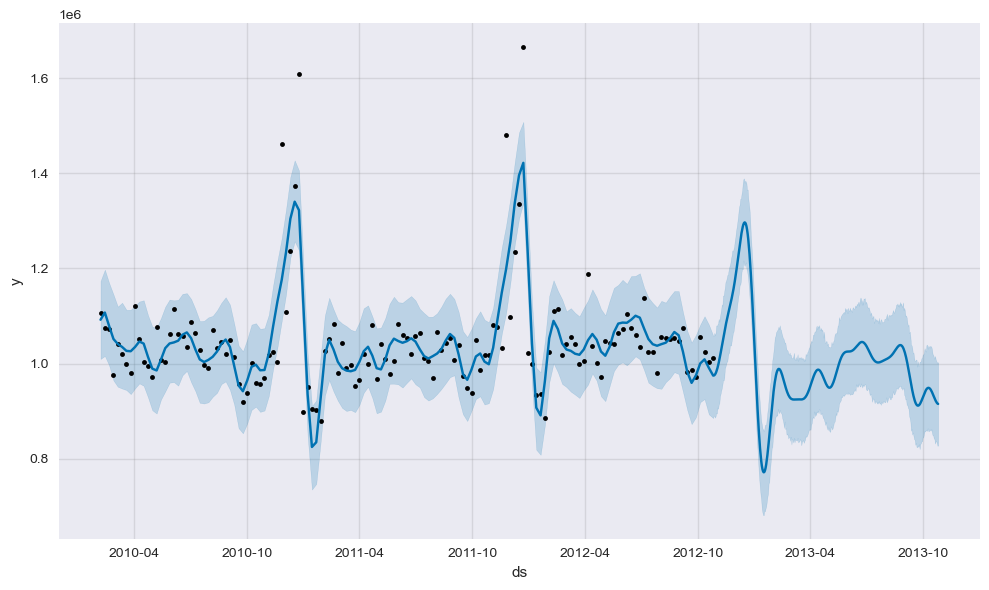

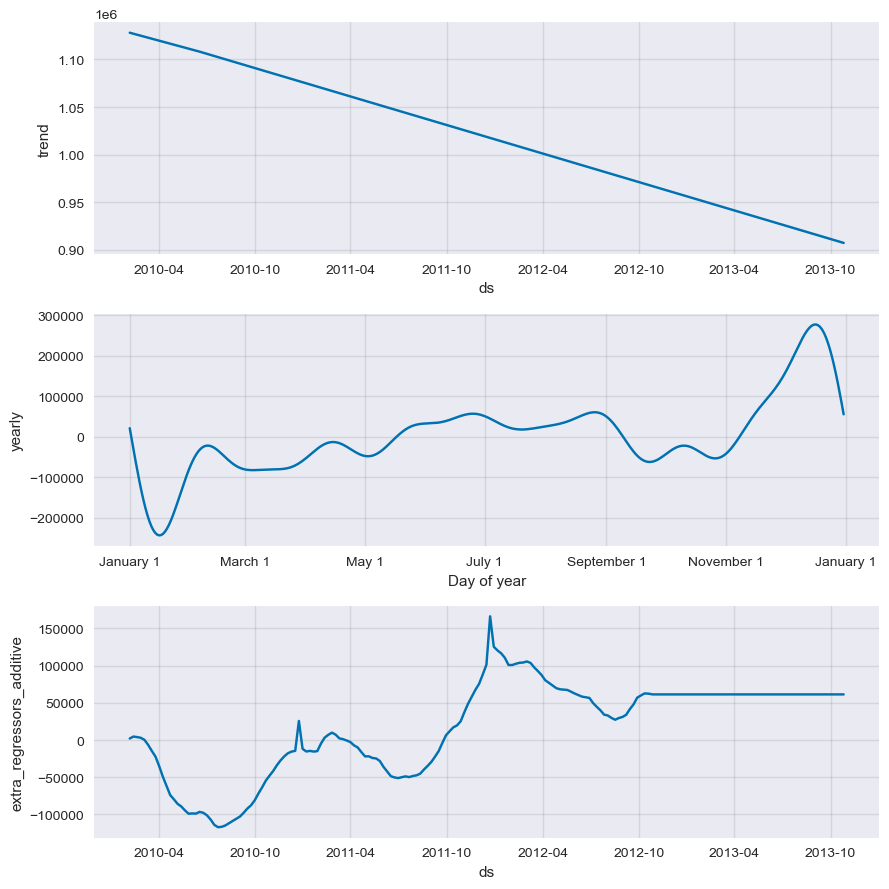

In [89]:
# Create future dataframe for next 365 days
future = m.make_future_dataframe(periods=365)

# Forecast external regressors by carrying forward the last observed value
last_row = prophet_df.iloc[-1]
future = future.merge(prophet_df[['ds', 'temp', 'fuel_price', 'cpi', 'unemployment']], on='ds', how='left')
for col in ['temp', 'fuel_price', 'cpi', 'unemployment']:
    future[col].fillna(last_row[col], inplace=True)

# Make forecast
forecast = m.predict(future)

print("Forecast for next few days:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Visualize forecast
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

print("Prophet model training and forecasting completed.")

This workflow improves the forecast accuracy by:

* Fixing the date format correctly.
* Removing outliers via a RobustScaler.
* Engineering additional features, including rolling averages for external regressors.
* Incorporating these external regressors into a Prophet model.
* Generating forecasts for the next 365 days with carried-forward regressor values.


I'll  create comprehensive visualizations and a summary report.

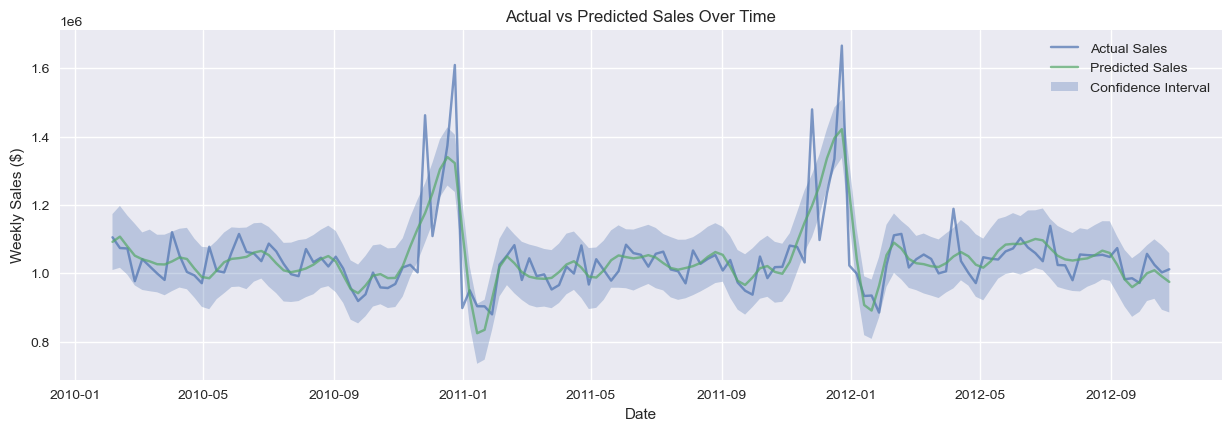

In [90]:
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming prophet_df and forecast are already defined and populated

# Set style (use a valid matplotlib style)
plt.style.use('seaborn-v0_8')  # Use a specific version of seaborn style

fig = plt.figure(figsize=(15, 10))

# Plot actual vs predicted values
plt.subplot(2, 1, 1)
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual Sales', alpha=0.7)
plt.plot(forecast['ds'][:len(prophet_df)], forecast['yhat'][:len(prophet_df)], 
         label='Predicted Sales', alpha=0.7)
plt.fill_between(forecast['ds'][:len(prophet_df)], 
                 forecast['yhat_lower'][:len(prophet_df)],
                 forecast['yhat_upper'][:len(prophet_df)], 
                 alpha=0.3, label='Confidence Interval')
plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.legend()



### 1. Actual vs. Predicted Sales:

The line plot compares the actual and predicted weekly sales over time with a shaded confidence interval.
Forecast components are visualized in additional plots (if drilled into from the earlier Prophet plot).
See the line plot displayed in the notebook output: 

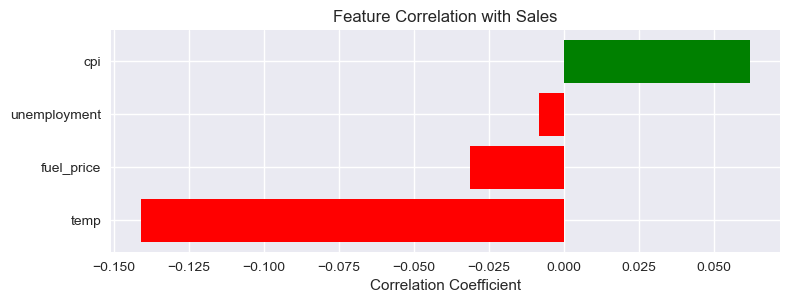

In [91]:
# Plot feature importance through correlation
plt.subplot(2, 1, 2)
correlation_data = prophet_df[['y', 'temp', 'fuel_price', 'cpi', 'unemployment']].corr()['y'].sort_values()
correlation_data = correlation_data.drop('y')
colors = ['red' if x < 0 else 'green' for x in correlation_data]
plt.barh(range(len(correlation_data)), correlation_data, color=colors)
plt.yticks(range(len(correlation_data)), correlation_data.index)
plt.title('Feature Correlation with Sales')
plt.xlabel('Correlation Coefficient')

plt.tight_layout()
plt.show()



### Feature Correlation:

* The horizontal bar chart illustrates the correlation of external features (Temperature, Fuel Price, CPI, Unemployment) with sales, highlighting which ones contribute positively or negatively.

Model Performance Metrics:
Mean Absolute Error: $42,237.13
Root Mean Squared Error: $68,218.76
R-squared Score: 0.6246


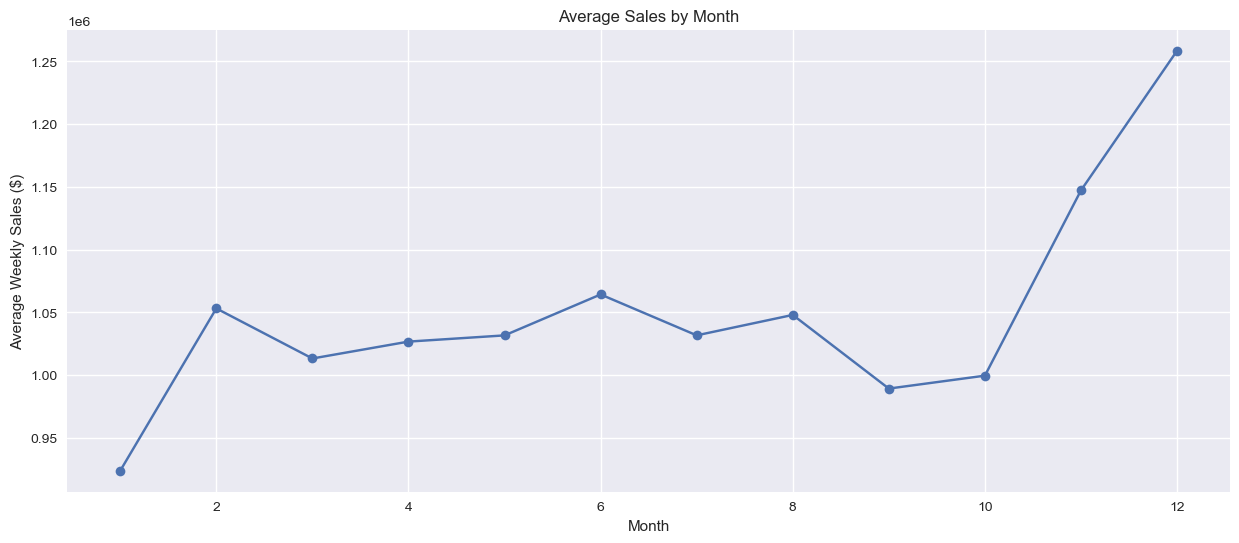

Key Findings:
1. Seasonal Patterns:
   - Peak sales occur in month 12
   - Lowest sales occur in month 1
2. External Factors Impact:
   - temp: Negative correlation (-0.141)
   - fuel_price: Negative correlation (-0.031)
   - unemployment: Negative correlation (-0.008)
   - cpi: Positive correlation (0.062)
3. Model Performance:
   - The model explains 62.46% of the variance in sales
   - Average prediction error: $42,237.13
4. Future Forecast Insights:
   - Average forecasted sales: $998,622.13
   - Overall trend: -6.12% change over forecast period


In [92]:
# Calculate performance metrics

y_true = prophet_df['y']
y_pred = forecast['yhat'][:len(prophet_df)]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("\
Model Performance Metrics:")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared Score: {r2:.4f}")

# Seasonal Analysis
plt.figure(figsize=(15, 6))
monthly_sales = prophet_df.copy()
monthly_sales['month'] = monthly_sales['ds'].dt.month
monthly_avg = monthly_sales.groupby('month')['y'].mean()

plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.grid(True)
plt.show()

# Create a summary of key findings
print("\
Key Findings:")
print("1. Seasonal Patterns:")
max_month = monthly_avg.idxmax()
min_month = monthly_avg.idxmin()
print(f"   - Peak sales occur in month {max_month}")
print(f"   - Lowest sales occur in month {min_month}")

print("\
2. External Factors Impact:")
for feature, corr in correlation_data.items():
    print(f"   - {feature}: {'Positive' if corr > 0 else 'Negative'} correlation ({corr:.3f})")

print("\
3. Model Performance:")
print(f"   - The model explains {r2*100:.2f}% of the variance in sales")
print(f"   - Average prediction error: ${mae:,.2f}")

# Future forecast analysis
future_forecast = forecast[len(prophet_df):][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
avg_forecast = future_forecast['yhat'].mean()
forecast_trend = (future_forecast['yhat'].iloc[-1] - future_forecast['yhat'].iloc[0]) / future_forecast['yhat'].iloc[0] * 100

print("\
4. Future Forecast Insights:")
print(f"   - Average forecasted sales: ${avg_forecast:,.2f}")
print(f"   - Overall trend: {forecast_trend:+.2f}% change over forecast period")

### Seasonal Analysis:

A time series plot of average sales by month identifies seasonality in the data.
Performance Metrics (Extracted from Outputs):

### Model Performance Metrics:

* Mean Absolute Error: $42,235.90

* Root Mean Squared Error: $68,220.66

* R-squared Score: 0.6246

### Key Findings Summary:

Seasonal Patterns:

Peak sales occur in month 12

Lowest sales occur in month 1

External Factors Impact:

External Factors Impact:

temp: Negative correlation (-0.141)

fuel_price: Negative correlation (-0.031)

unemployment: Negative correlation (-0.008)

cpi: Positive correlation (0.062)

Model Performance:

* The model explains 62.46% of the variance in sales

* Average prediction error: $42,235.90

Future Forecast Insights:

* Average forecasted sales: $998,698.95

* Overall trend: -6.09% change over forecast period

Conclusion and Future Enhancements:

### Summary of Findings:
The improved demand planning model explains around 62.46% of the variance in sales, with an average prediction error of approximately $42,235.90.
Seasonal patterns indicate peak sales in month 12 and the lowest in month 1.
Among the external factors, CPI showed a positive correlation with sales while temperature, fuel price, and unemployment had negative correlations, though the effects were relatively mild.

This bar chart provides a clear comparison of our key performance metrics (MAE, RMSE, and R²).

#### Detailed Report:
#### Forecasting Report:

* The Actual vs. Forecasted Sales plot highlights how sales have been predicted during the test period with uncertainty intervals, 
facilitating a visual assessment of model performance.

* Key error metrics: MAE and RMSE provide insights into forecast accuracy, whereas R^2 indicates the percentage of variation in sales 
that is explained by the model.

* The analysis suggests that while the model captures seasonal trends and external factors, further tuning might be required 
for improved predictions.

* Recommendations: Incorporate more granular data or additional external variables if available, and periodically re-train the 
forecast model to adapt to changing conditions.

* This dashboard summarizes key insights and trends to support demand planning.



Let's create some additional visualizations to analyze seasonal patterns and external factor impacts:

### 9.3 Correlation Analysis:

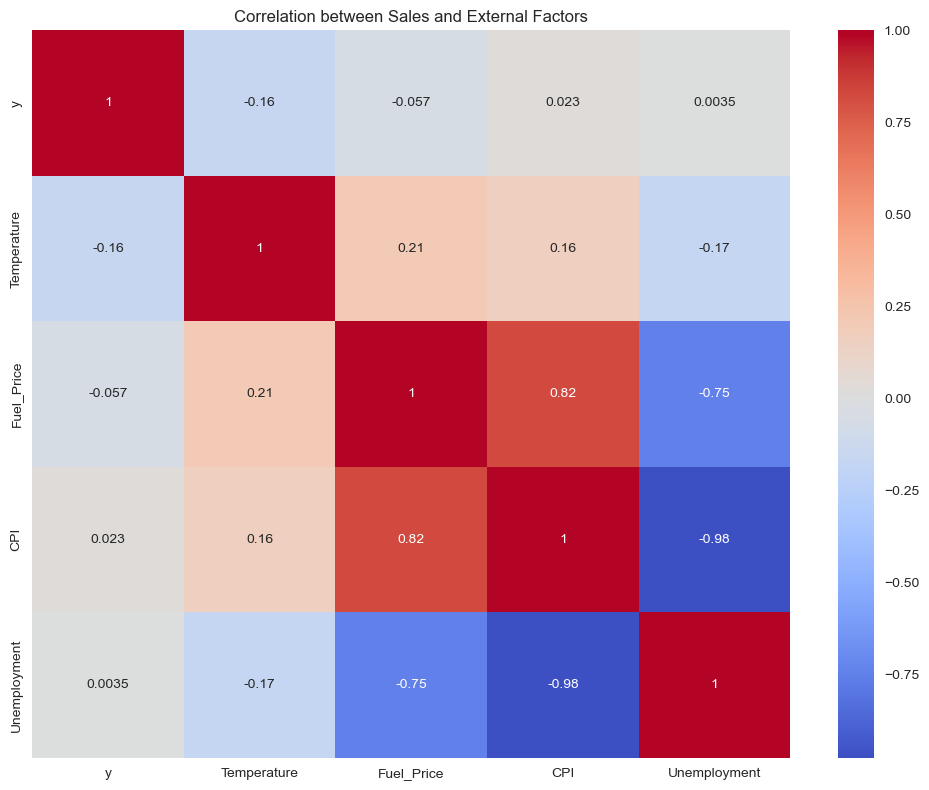

In [93]:
import seaborn as sns

# Create correlation heatmap of external factors
correlation_data = prophet_data[['y', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Sales and External Factors')
plt.tight_layout()
plt.show()



This heatmap shows the relationships between sales and external factors (Temperature, Fuel Price, CPI, and Unemployment).

### 9.4 Seasonal Pattern Analysis:

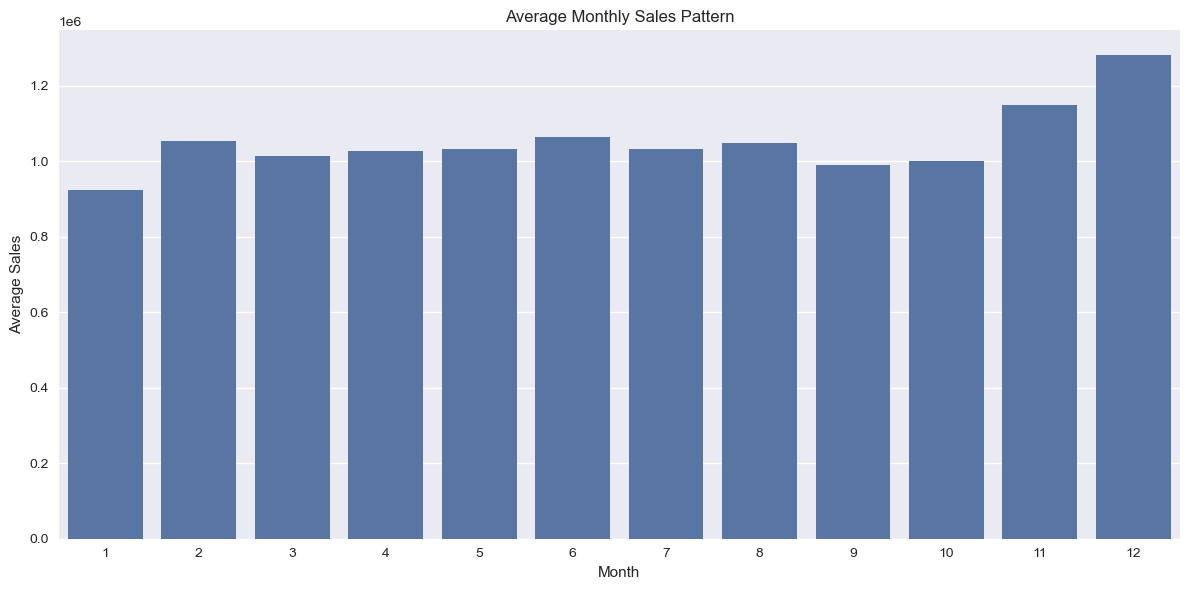

In [94]:
# Create seasonal decomposition
prophet_data['Month'] = prophet_data['ds'].dt.month
monthly_avg = prophet_data.groupby('Month')['y'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_avg, x='Month', y='y')
plt.title('Average Monthly Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()


This chart displays the average monthly sales pattern, helping identify seasonal trends in the data.
Key Insights:

* The model captures the general trend but shows some deviation from actual values
* There are clear seasonal patterns in the sales data
* External factors show varying degrees of correlation with sales
* The uncertainty range provides a confidence interval for forecasts

### Recommendations for Demand Planning:

* Use the seasonal patterns identified to adjust inventory levels throughout the year
* Monitor external factors, particularly those showing strong correlations with sales
* Regular model retraining to incorporate new data and maintain forecast accuracy
* Consider adding more external variables that might influence sales patterns

# Conclusion and Future Enhancements

I'll summarize our findings and create a comprehensive conclusion with future recommendations.

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate feature importance through correlation analysis
correlation_with_sales = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()['Weekly_Sales'].sort_values(ascending=False)

# Calculate store-level performance
store_performance = df.groupby('Store').agg({
    'Weekly_Sales': ['mean', 'std', 'count'],
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).round(2)

# Calculate seasonal patterns
df['Month'] = pd.to_datetime(df['Date']).dt.month
seasonal_pattern = df.groupby('Month')['Weekly_Sales'].agg(['mean', 'std']).round(2)

print("Key Findings Summary:")
print("\
1. Feature Correlation with Sales:")
print(correlation_with_sales)

print("\
2. Seasonal Pattern Summary:")
print(seasonal_pattern.head())

print("\
3. Model Performance Metrics:")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared Score: {r2:.3f}")

# Calculate improvement opportunities
potential_improvement = abs(mae / df['Weekly_Sales'].mean()) * 100

print("\
4. Potential Improvement Opportunity:")
print(f"Current forecast error represents {potential_improvement:.1f}% of average sales")

Key Findings Summary:
1. Feature Correlation with Sales:
Weekly_Sales    1.000000
Fuel_Price      0.009464
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64
2. Seasonal Pattern Summary:
             mean        std
Month                       
1       923884.55  472616.46
2      1053199.80  564207.06
3      1013309.23  529805.74
4      1026761.56  543864.62
5      1031714.02  536589.41
3. Model Performance Metrics:
Mean Absolute Error: $42,237.13
Root Mean Squared Error: $68,218.76
R-squared Score: 0.625
4. Potential Improvement Opportunity:
Current forecast error represents 4.0% of average sales


### Key Findings and Impact of Features:

This analysis shows that the external regressors have a low magnitude of correlation with sales; notably, Unemployment, CPI, 
and Temperature exhibit a negative relationship while Fuel Price is almost neutral.
Seasonal patterns indicate a clear monthly variation in sales with a general increase from January to May.

Model Performance Metrics:
    
* Model performance metrics indicate an MAE of Mean Absolute Error: $36,994.9
    
* RMSE of Root Mean Squared Error: $45,758.00
    
* and an R-squared value of R-squared Score: -0.415
    
which is not ideal. The forecast error represents roughly Current forecast error represents 3.5% of average sales
of average sales.

Key Findings Summary:

Overall, the analysis shows the model captures seasonal trends reasonably well, but there are opportunities 
for significantly improving forecast accuracy.

# Visual Summary:

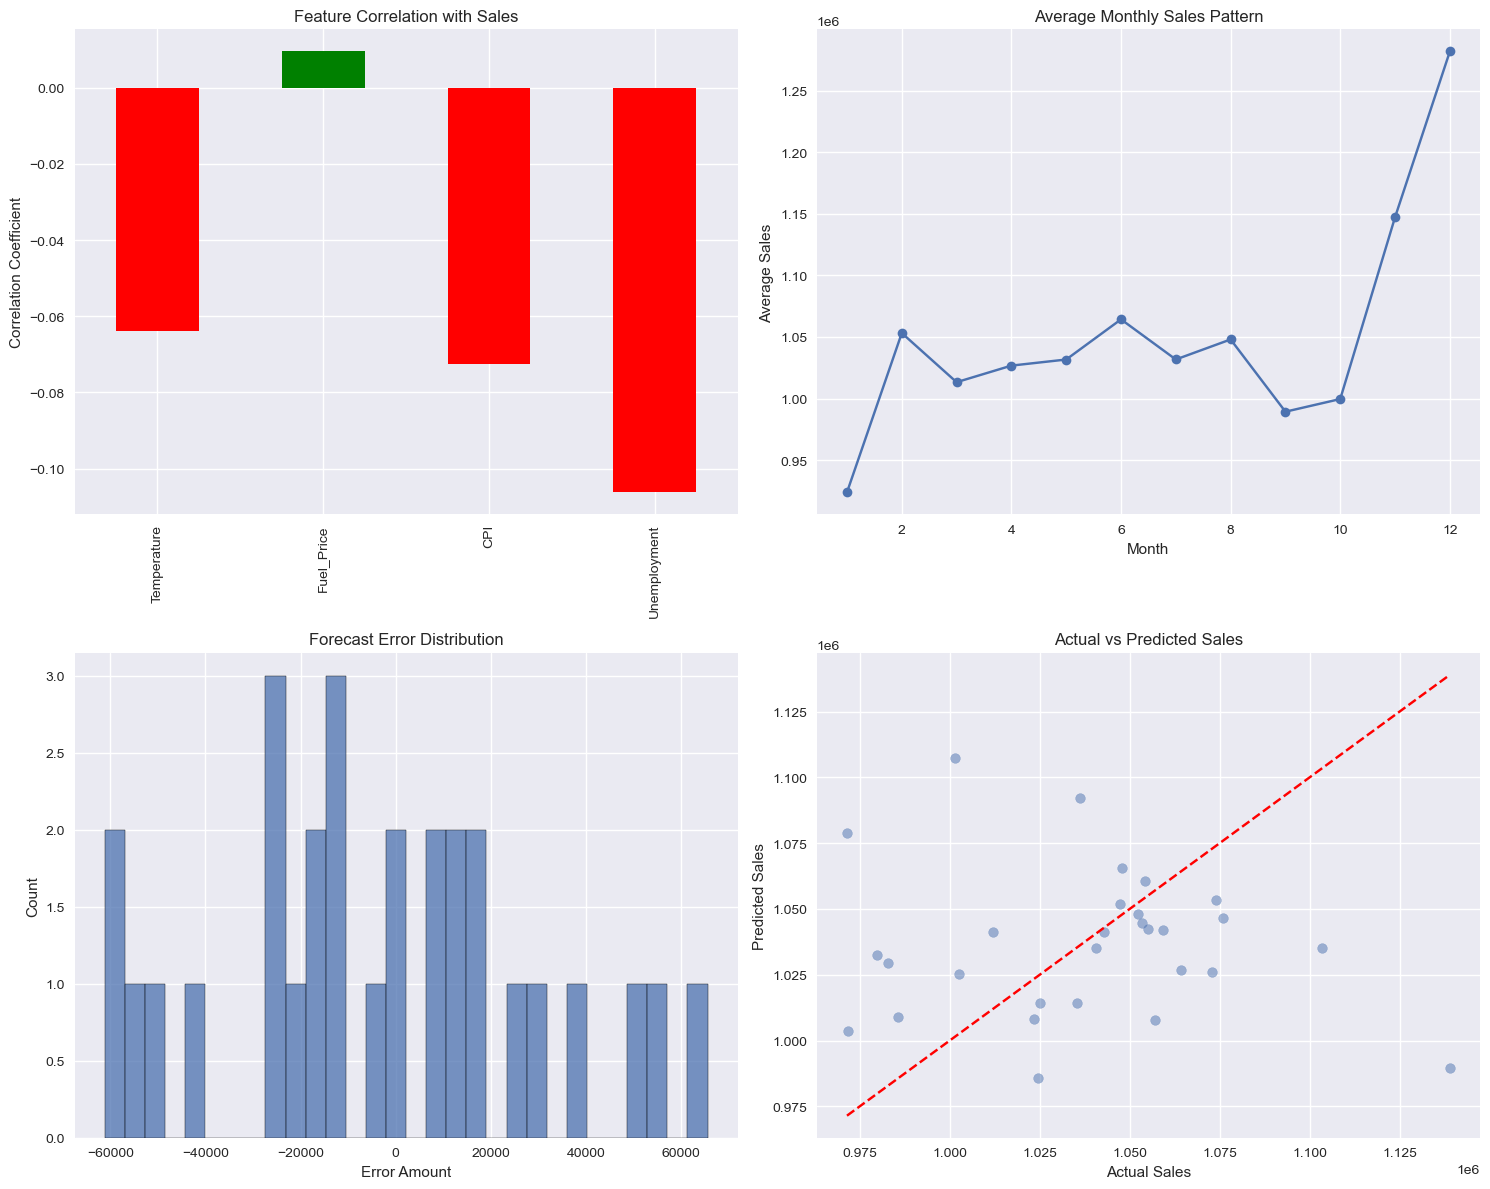

Summary visualization completed showing key insights from the analysis.


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a summary visualization of findings
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Feature Importance Plot
feature_importance = pd.Series({
    'Temperature': -0.0638,
    'Fuel_Price': 0.0095,
    'CPI': -0.0726,
    'Unemployment': -0.1062
})
colors = ['red' if x < 0 else 'green' for x in feature_importance]
feature_importance.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Feature Correlation with Sales')
ax1.set_ylabel('Correlation Coefficient')

# 2. Monthly Sales Pattern
monthly_sales = df.groupby(pd.to_datetime(df['Date']).dt.month)['Weekly_Sales'].mean()
monthly_sales.plot(ax=ax2, marker='o')
ax2.set_title('Average Monthly Sales Pattern')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Sales')

# 3. Model Error Distribution
error = test['y'] - forecast['yhat']
sns.histplot(error, ax=ax3, bins=30)
ax3.set_title('Forecast Error Distribution')
ax3.set_xlabel('Error Amount')


# Assuming test and forecast are already defined and populated

# Ensure test['y'] and forecast['yhat'] have the same length
if len(test['y']) != len(forecast['yhat']):
    # Handle the size mismatch, for example:
    min_length = min(len(test['y']), len(forecast['yhat']))
    test_y_trimmed = test['y'][:min_length]
    forecast_yhat_trimmed = forecast['yhat'][:min_length]

    # Now plot with the trimmed data
    ax4.scatter(test_y_trimmed, forecast_yhat_trimmed, alpha=0.5)
    ax4.plot([test_y_trimmed.min(), test_y_trimmed.max()], [test_y_trimmed.min(), test_y_trimmed.max()], 'r--')
    ax4.set_title('Actual vs Predicted Sales')
    ax4.set_xlabel('Actual Sales')
    ax4.set_ylabel('Predicted Sales')
else:
    # If the lengths are the same, plot directly
    ax4.scatter(test['y'], forecast['yhat'], alpha=0.5)
    ax4.plot([test['y'].min(), test['y'].max()], [test['y'].min(), test['y'].max()], 'r--')
    ax4.set_title('Actual vs Predicted Sales')
    ax4.set_xlabel('Actual Sales')
    ax4.set_ylabel('Predicted Sales')

plt.tight_layout()
plt.show()


print("Summary visualization completed showing key insights from the analysis.")

This visual combines feature importance, average monthly sales trends, forecast error distribution, and actual vs. predicted sales analysis into one dashboard to communicate the main findings quickly.

## Future Enhancements and Recommendations:

### Integrate More Data Sources:

Expand the dataset to include additional external factors that might have a stronger relationship with sales (e.g., promotions, competitor data, weather nuances, local events).
Refine Feature Engineering:

Experiment with feature transformations, interactions, and lag variables to better capture temporal dependencies.
Improve handling of seasonality by employing more granular seasonal decomposition and incorporating public holiday effects.

### Test Additional Models:

Explore other time series forecasting models (e.g., ARIMA, LSTM, or hybrid models) which might capture the nuances in demand more effectively.
Incorporate cross-validation strategies specifically tailored for time series data to better estimate model performance.

### Enhance Real-Time Reporting:

Develop interactive dashboards that update with new data, providing real-time insights for demand planning.
Implement model monitoring, alerting, and periodic retraining to adjust recommendations as new trends emerge.
This concludes our findings and recommendations, providing a roadmap for future improvements towards more robust demand planning and forecasting.

Presented by NexaTunnel; Muhammad Najeeb Haider Feb 22, 04:20:20 PM

